# Combine unfolded results and make final plots

Here is the script to assemble the unfolded results from `2DData_expunc.root` and `2DClosure_expunc.root` and make the final plots of the analysis. 

Note: You have to access the files through cernbox as they are too large for github. 

https://cernbox.cern.ch/cernbox/desktop/index.php/s/rsYvLcidoUFEKV0

https://cernbox.cern.ch/cernbox/desktop/index.php/s/DsRRXR9bEKOGzoU



In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")



Welcome to JupyROOT 6.08/06


0L

In [2]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
ROOT.gStyle.SetLabelFont(43,"XYZ")
ROOT.gStyle.SetLabelSize(22,"XYZ")

lumi = 2.3e3

pythiafile = "responses_jecsrcs_otherway_qcdmc_2dplots.root"
herwigfile = "qcdmc_herwig_otherway_jecsrcs_2dplots.root"


#### Absolute cross section for ungroomed jets

254535951.654
data integral: 81.9570817813
pythia integral: 80.6442854191
herwig integral: 84.1881193246


Info in <TCanvas::Print>: png file fullxs_absolute1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute6.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute7.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute7

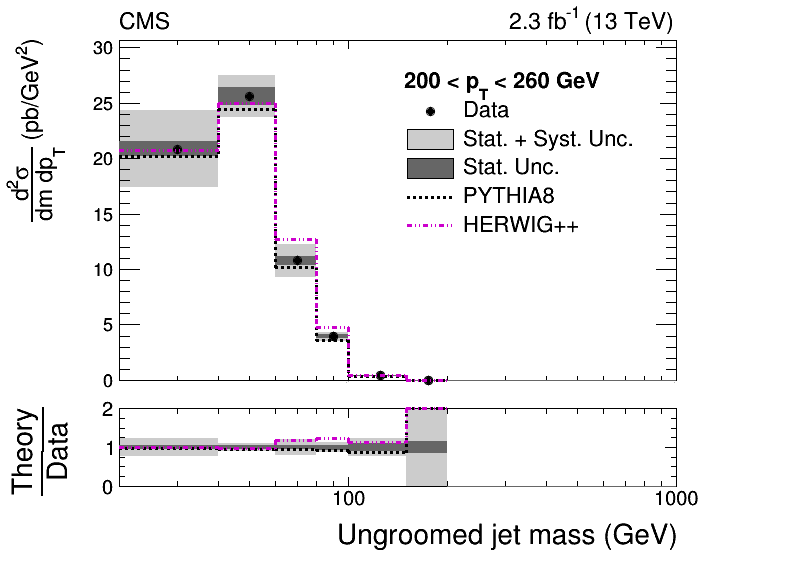

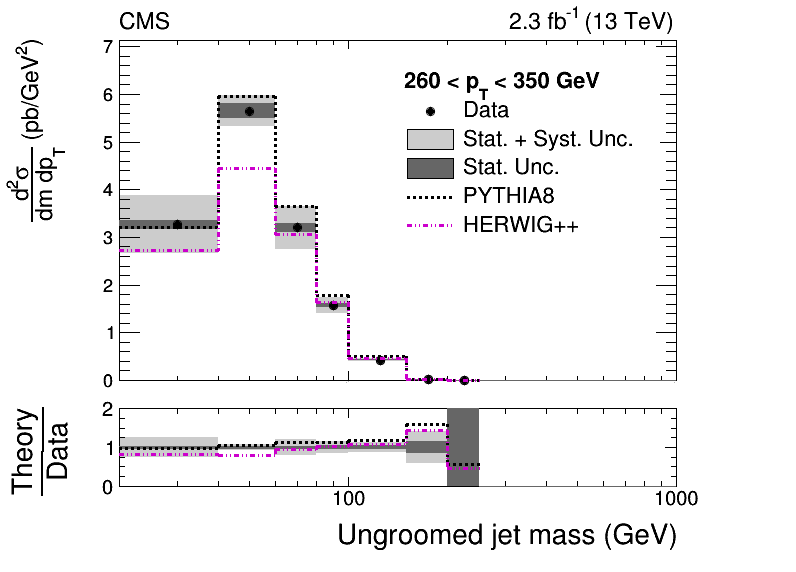

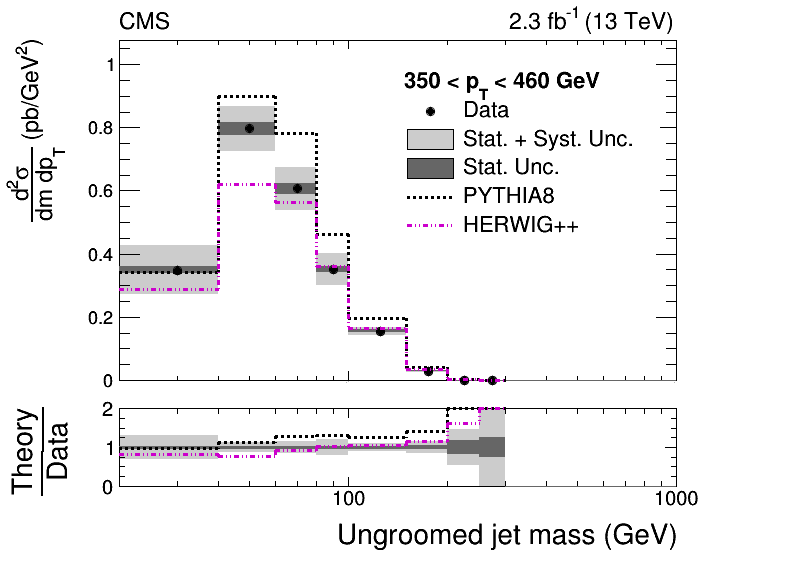

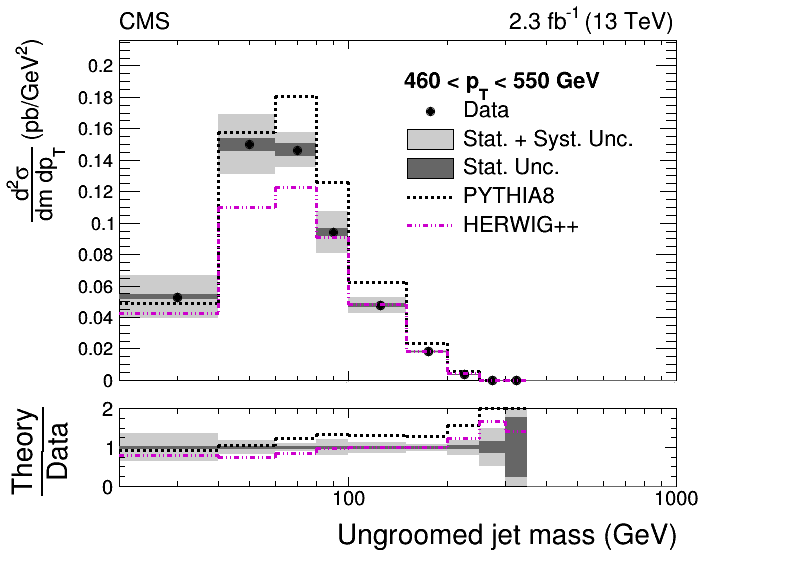

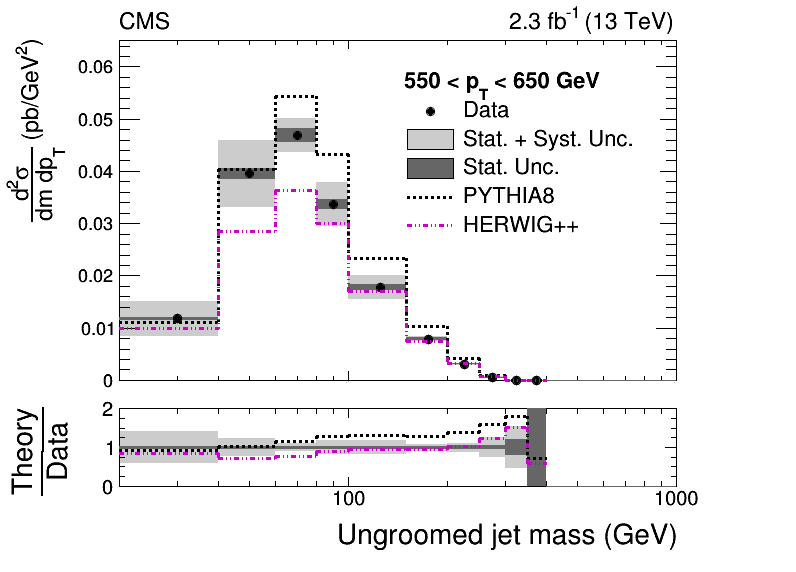

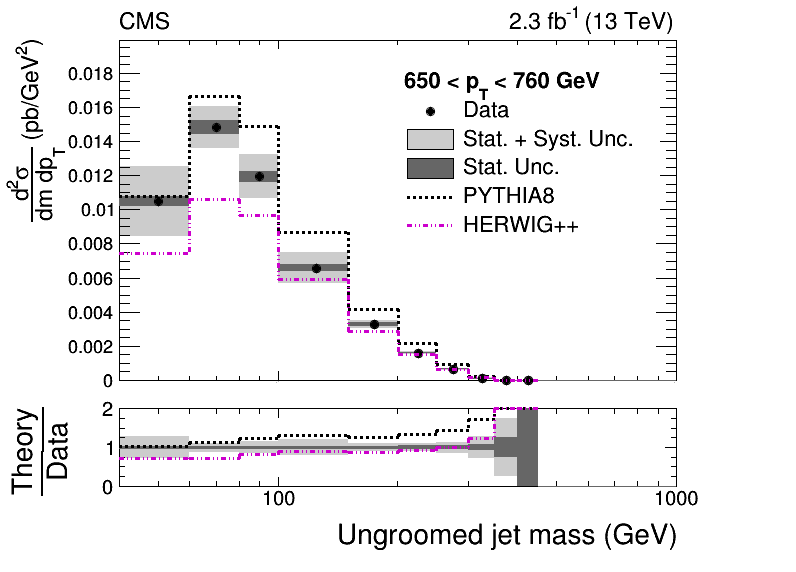

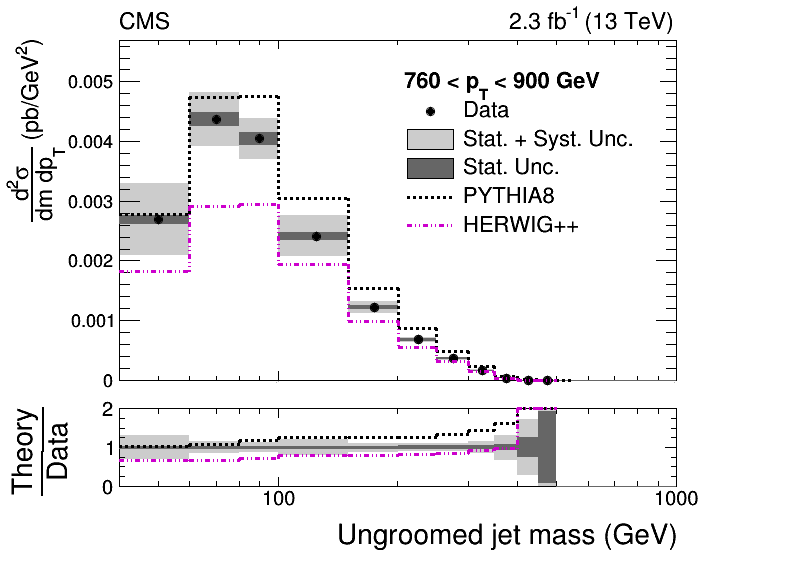

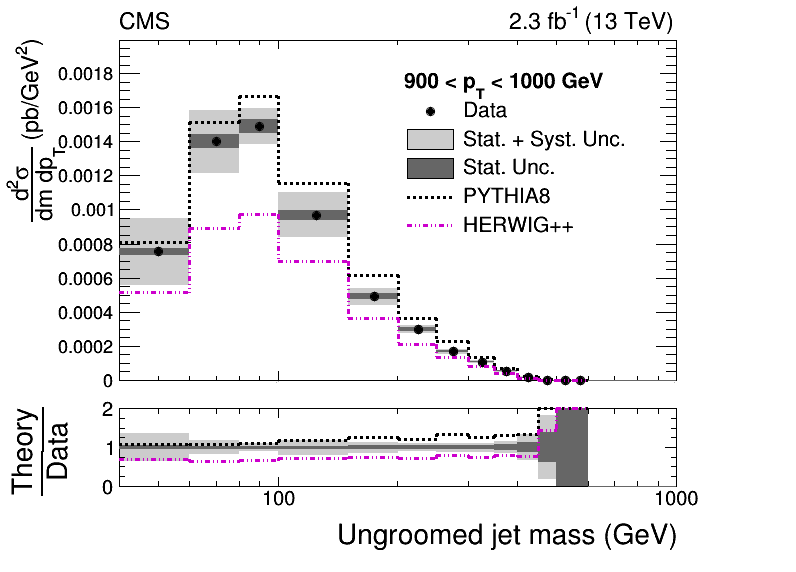

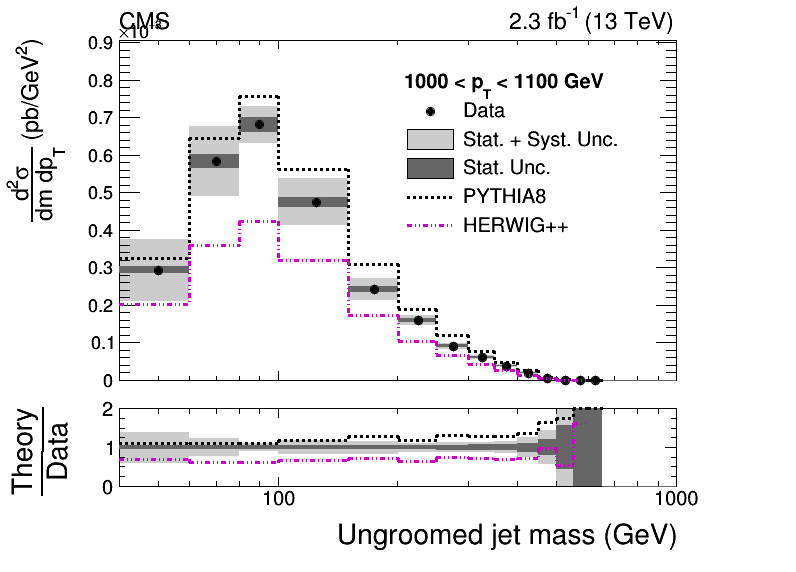

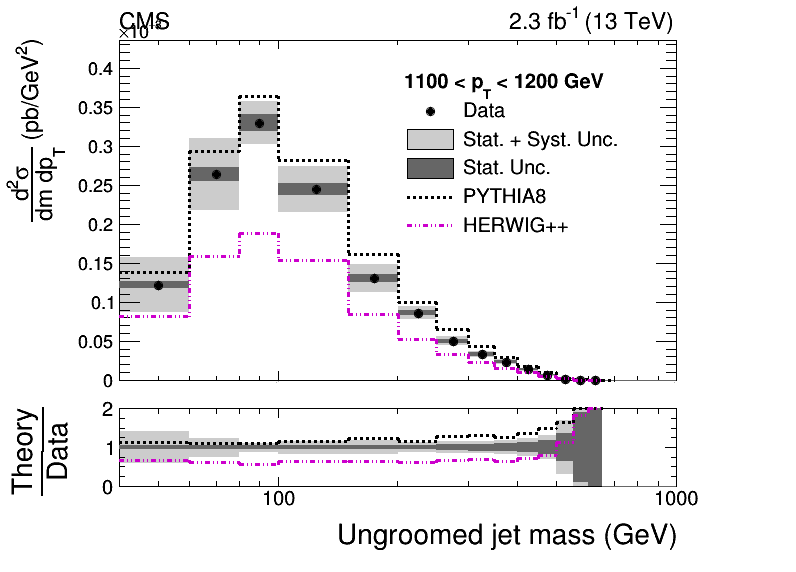

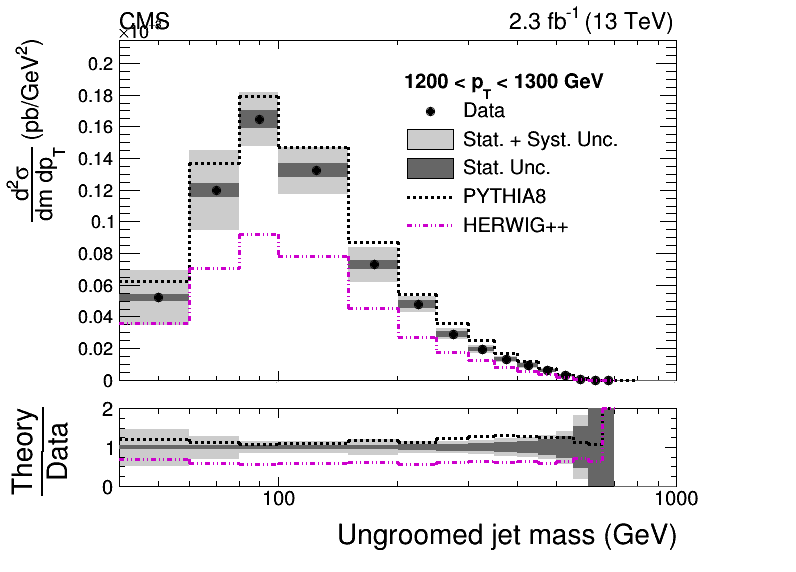

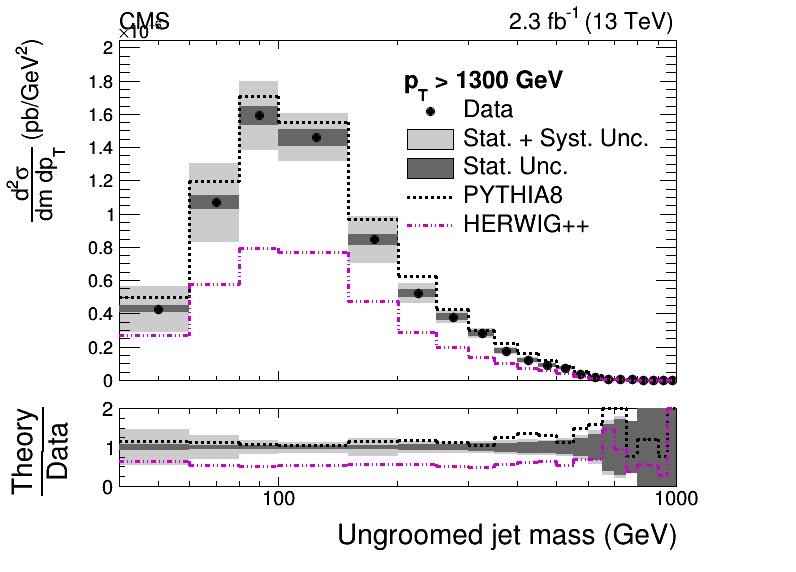

In [3]:
uu = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute") 

print 'data integral:' , uu.nom.Integral() 
print 'pythia integral:' , uu.pythiaHist.Integral()
print 'herwig integral:' , uu.herwigHist.Integral() 

uu.plotFullXSProjections( hists=[uu.nom, uu.nomStat,uu.pythiaHist,uu.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )




#### Absolute cross section for groomed jets. 

250943650.465


Info in <TCanvas::Print>: png file fullxs_absolute_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop6.pdf has been created
Info in <TCanvas

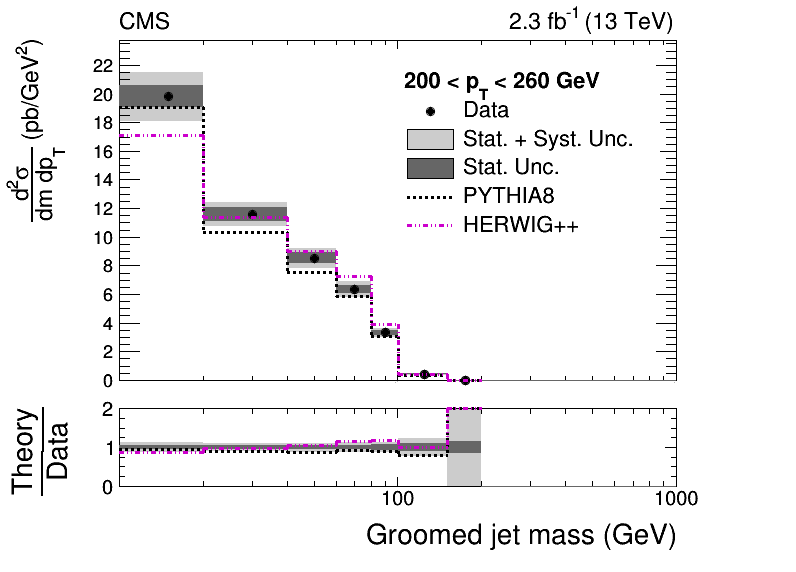

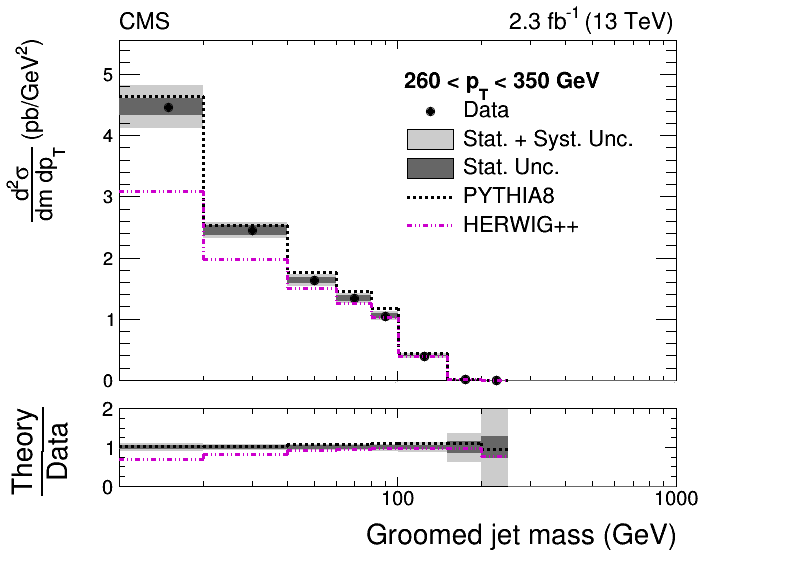

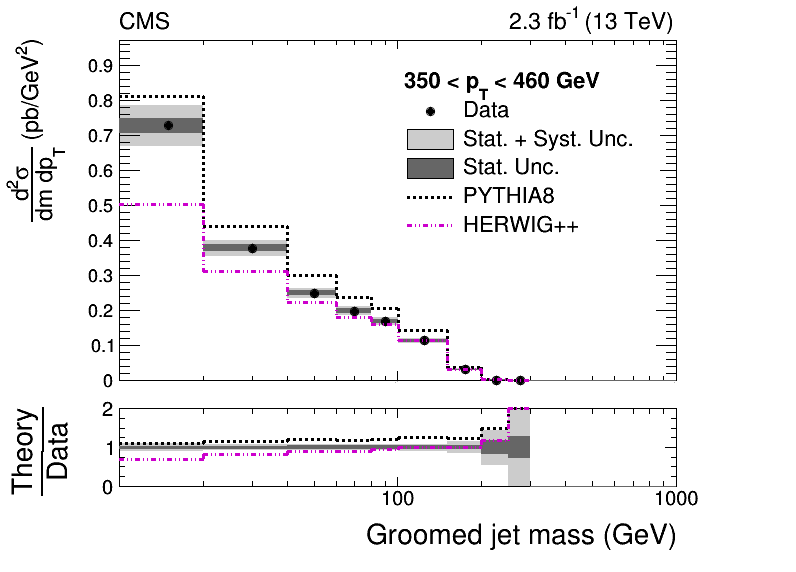

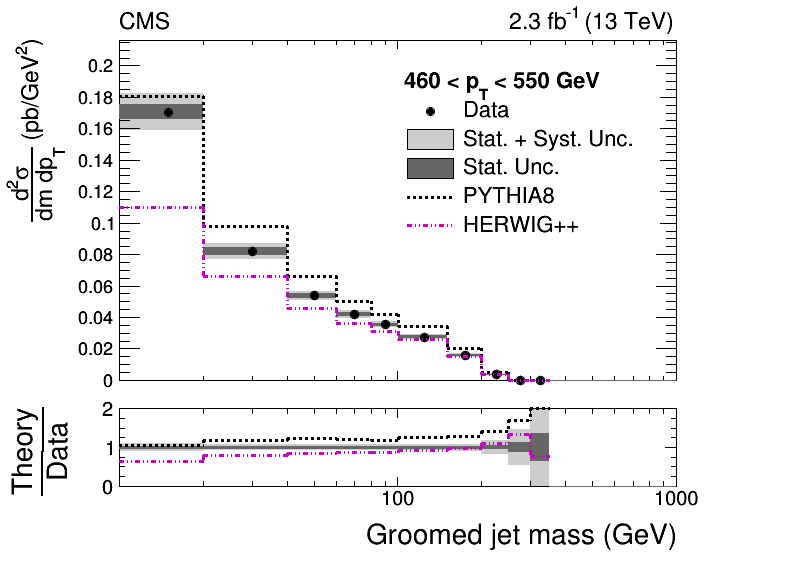

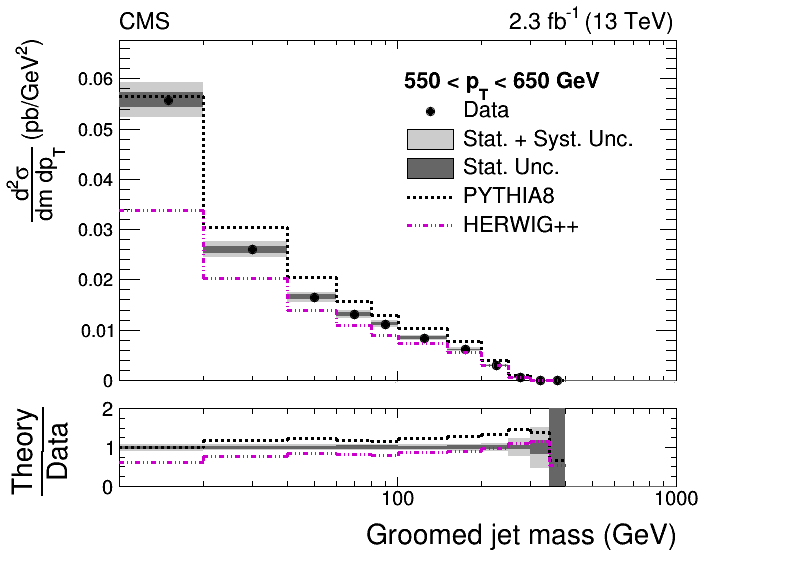

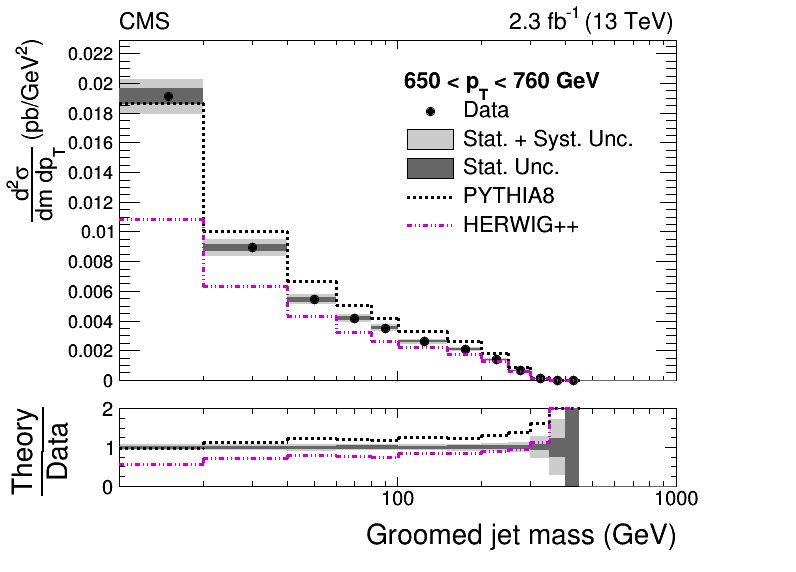

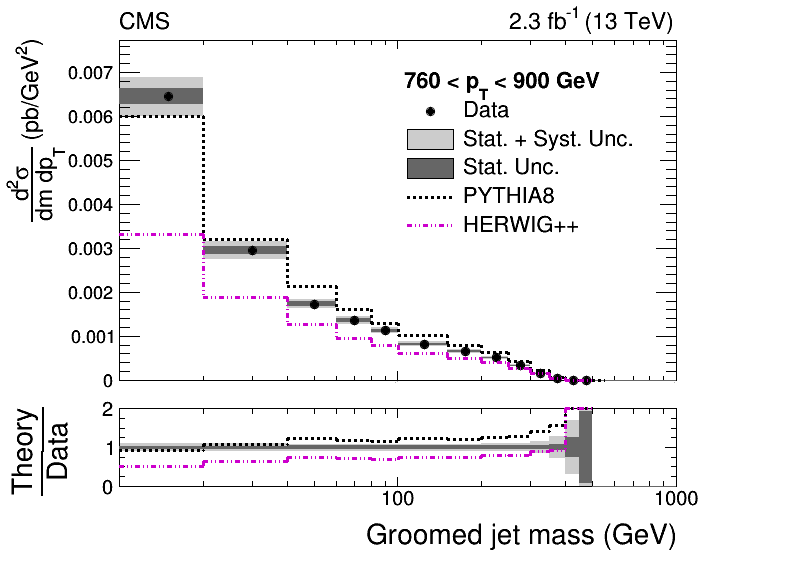

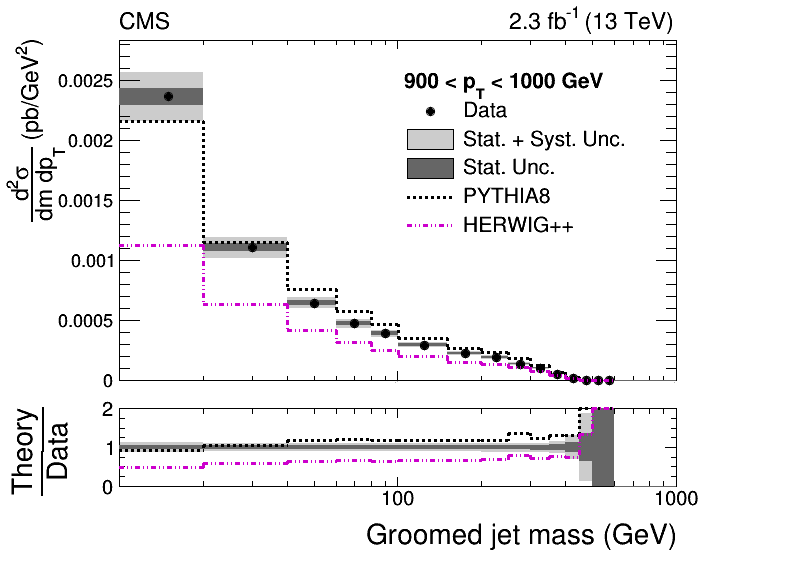

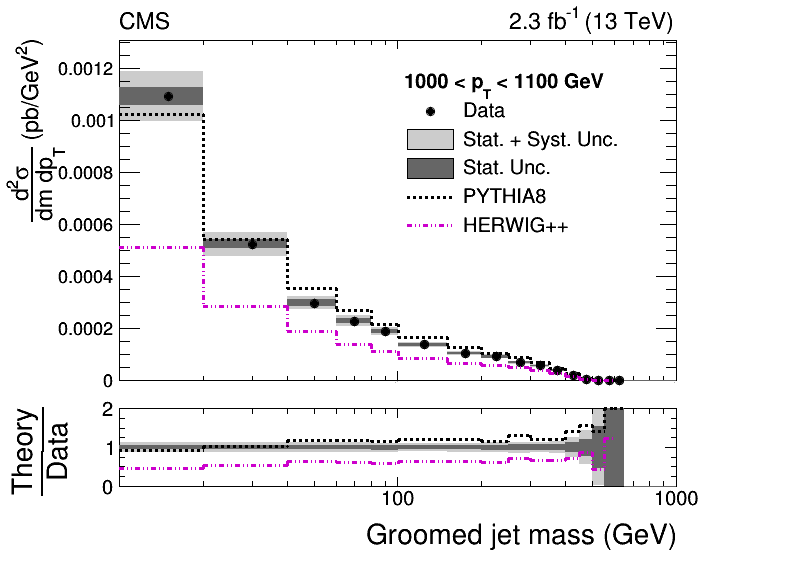

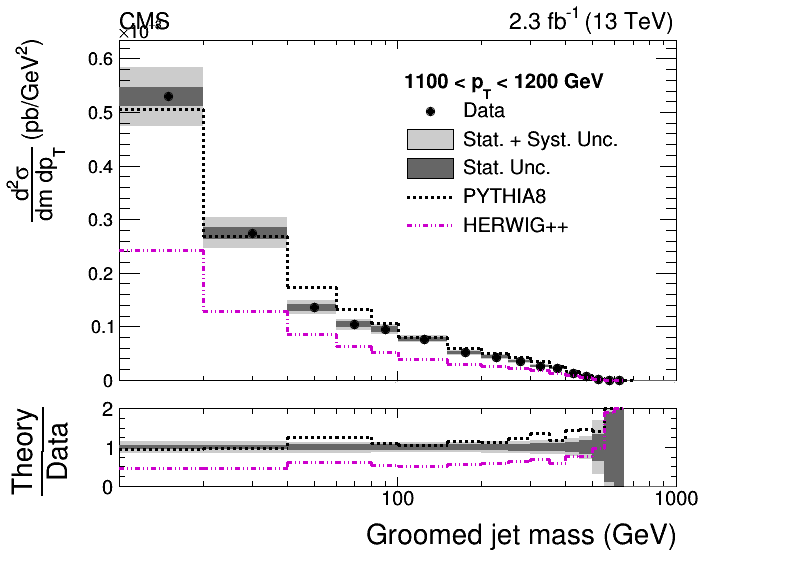

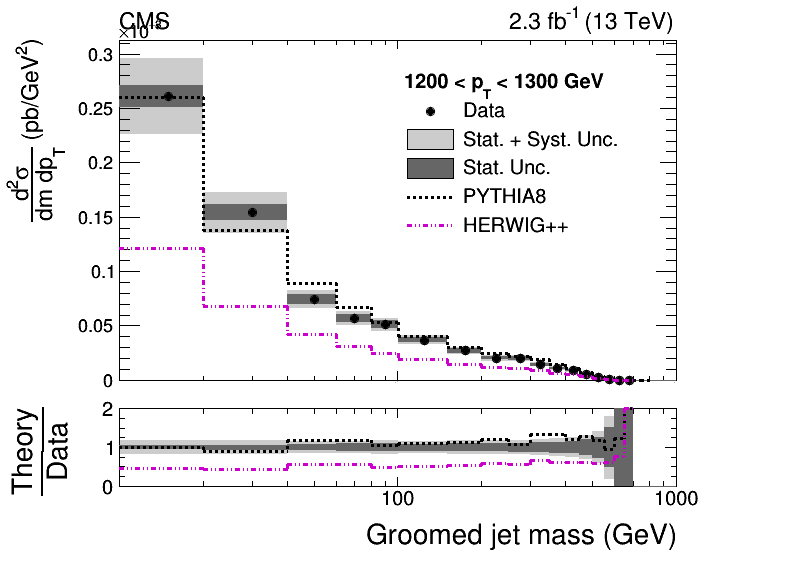

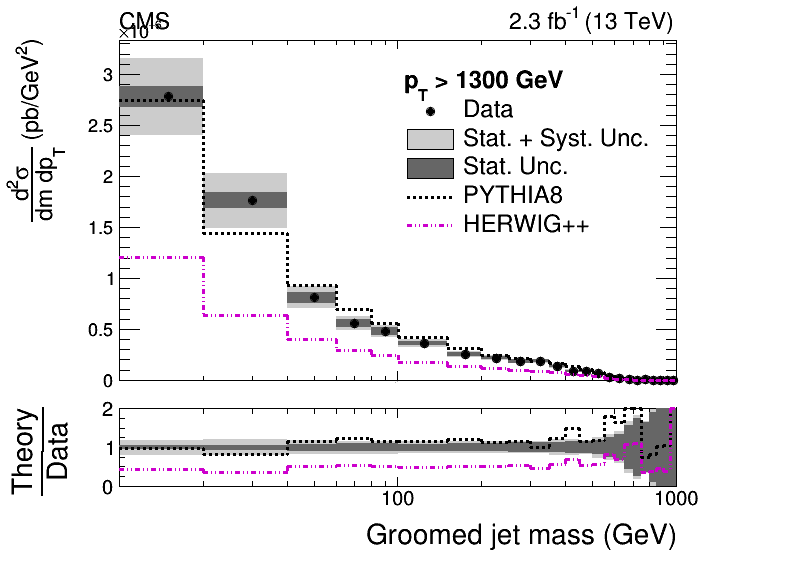

In [4]:

ug = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute_softdrop") 

ug.plotFullXSProjections( hists=[ug.nom, ug.nomStat,ug.pythiaHist,ug.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )


#### Absolute cross section wrt pt

Info in <TCanvas::Print>: png file pt_xs.png has been created
Info in <TCanvas::Print>: pdf file pt_xs.pdf has been created


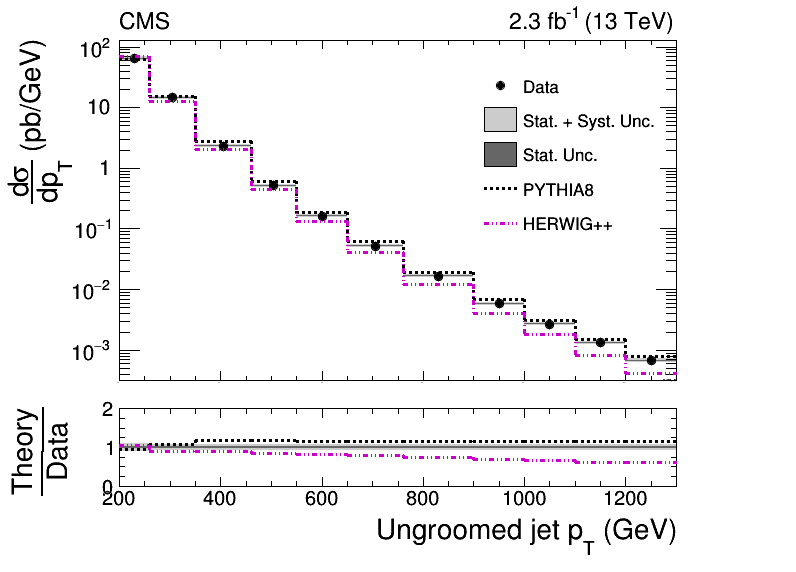

In [5]:
uu.plotPtDist( hists=[uu.nom, uu.nomStat, uu.pythiaHist, uu.herwigHist],
                   styleNames=['nom','nomStat','pythia','herwig'],
                   filename = "pt_xs", title=";Ungroomed jet p_{T} (GeV);#frac{d#sigma}{dp_{T}} (pb/GeV)" )






#### Then plot uncertainties


123597.850816
123328.214753


Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute1.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute2.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute3.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute4.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute5.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute5.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute6.png has been created
Info in <T

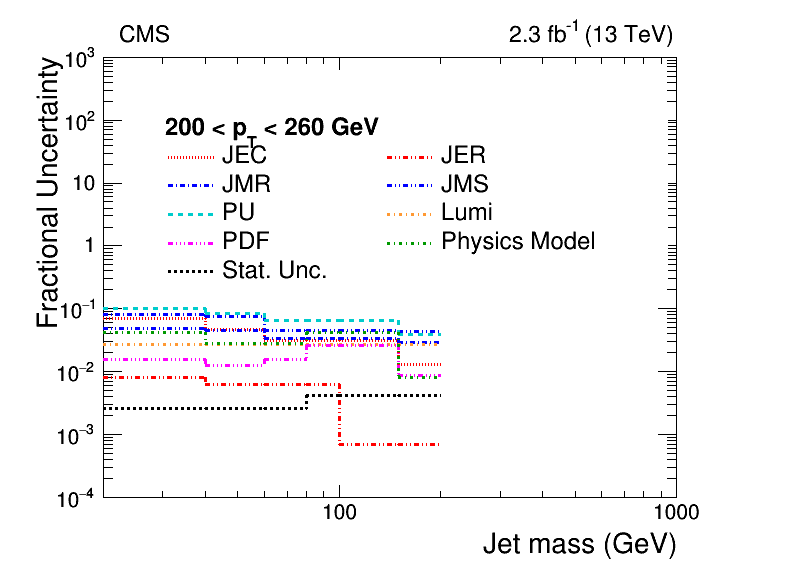

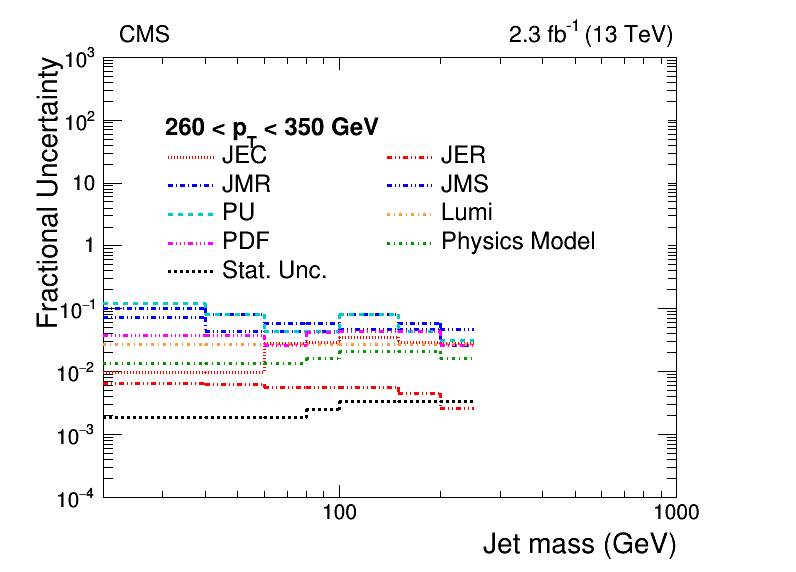

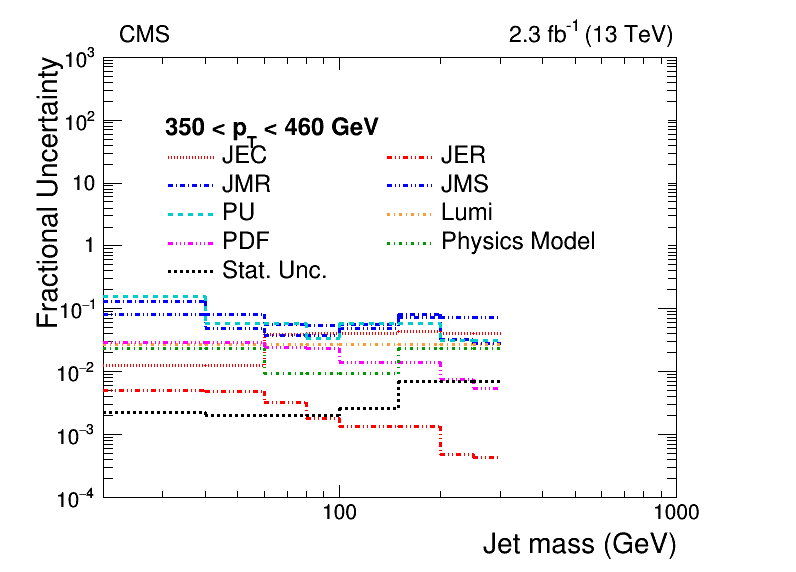

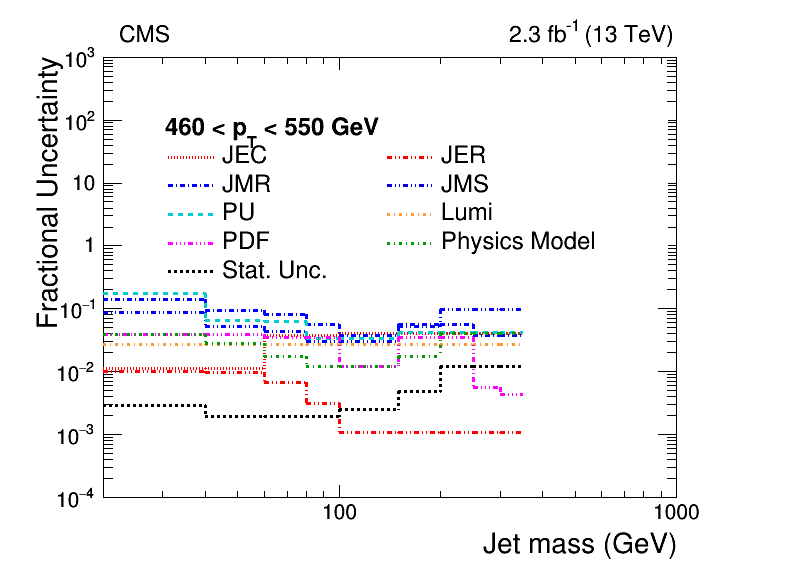

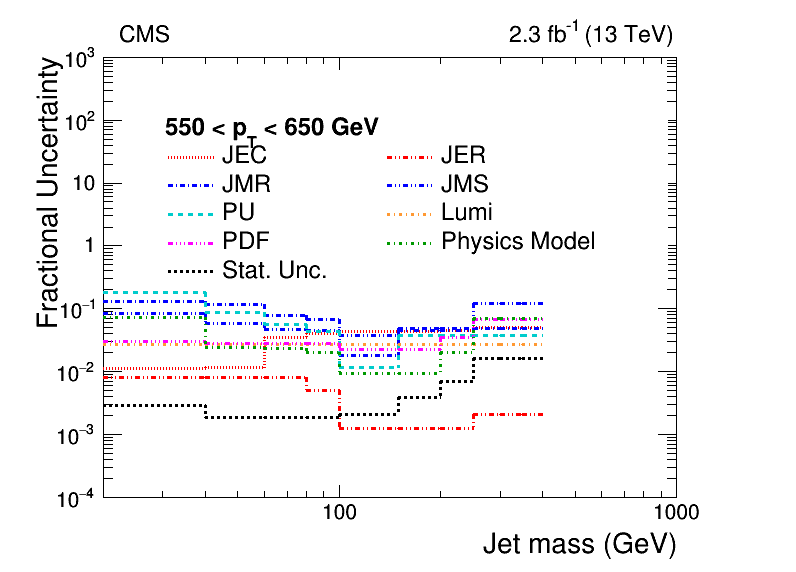

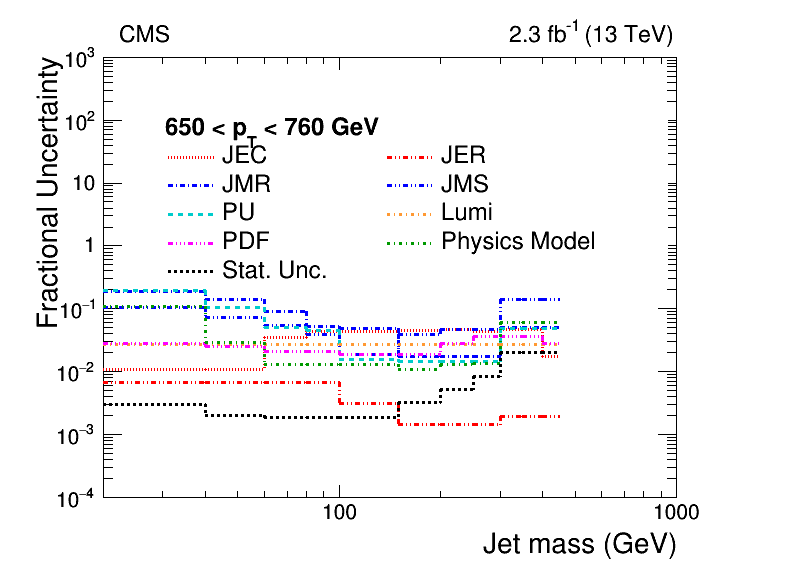

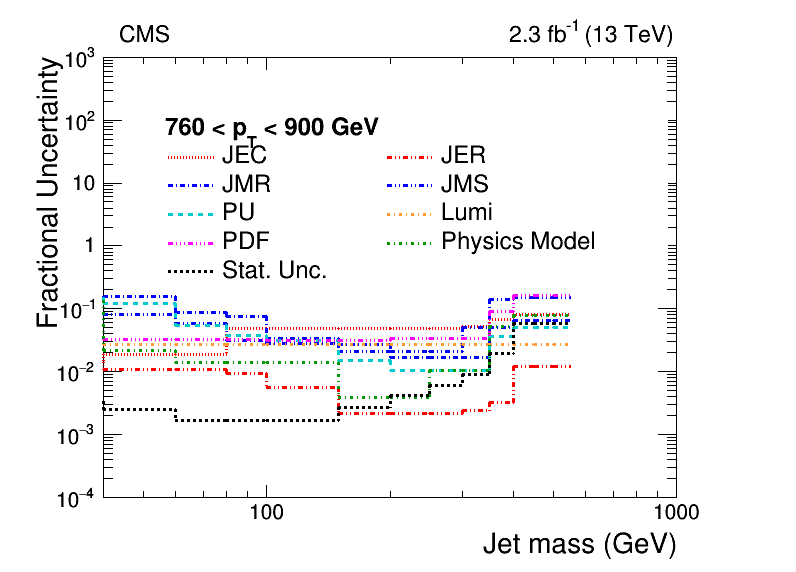

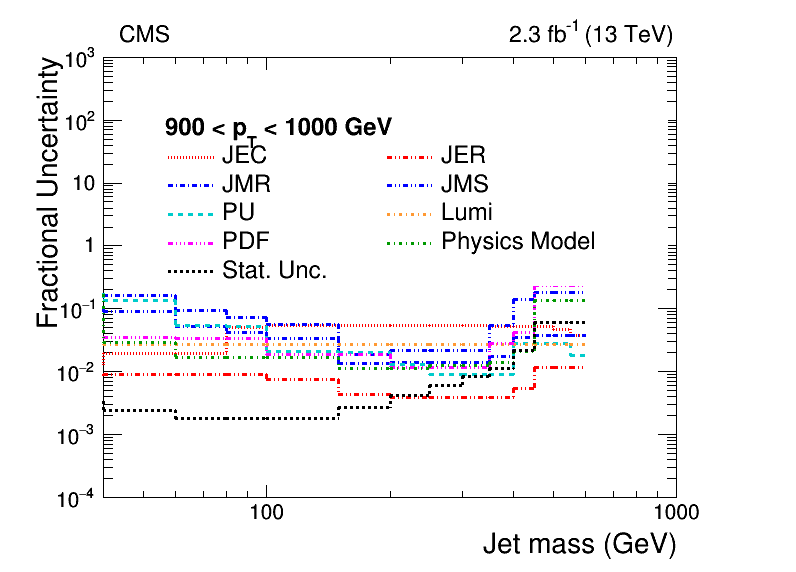

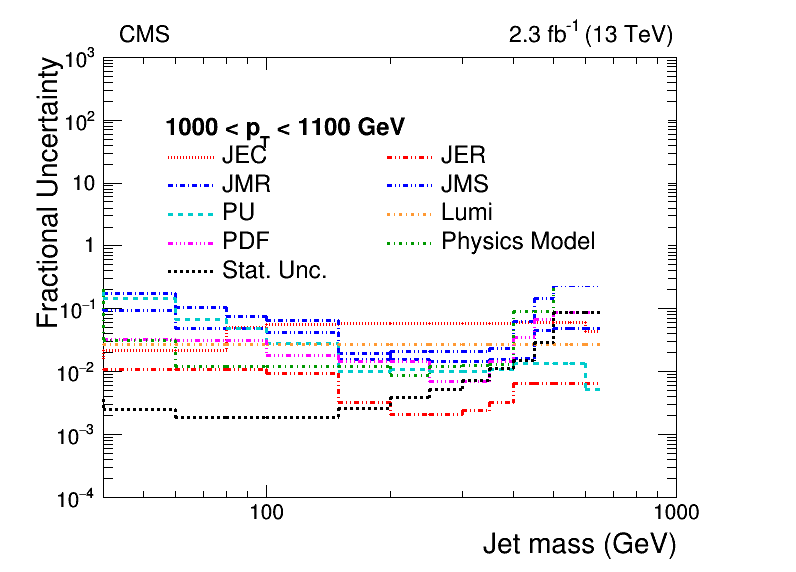

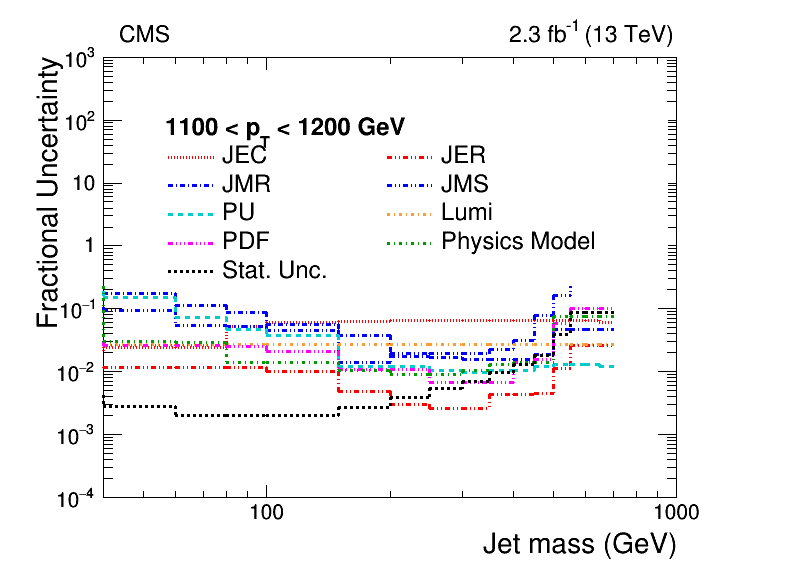

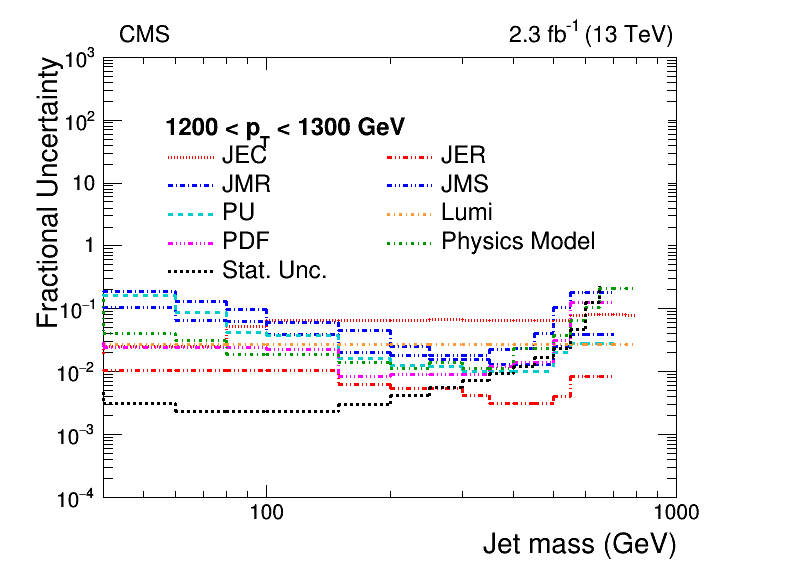

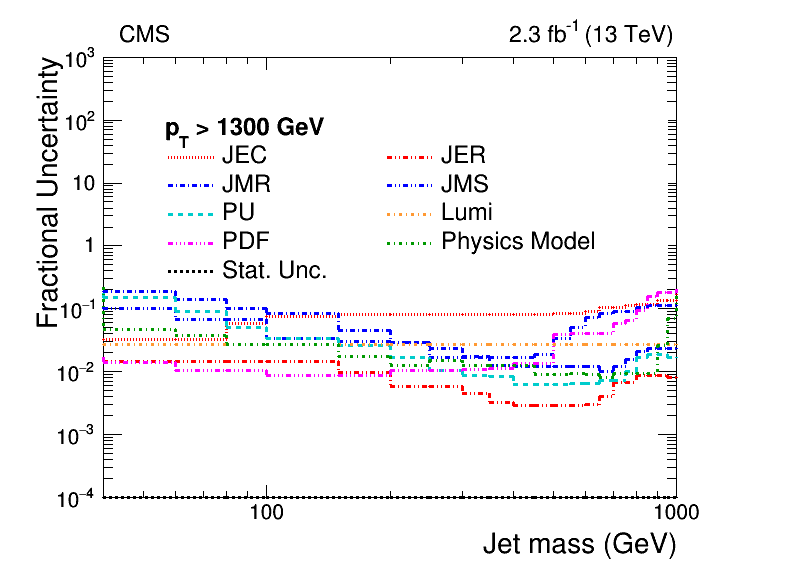

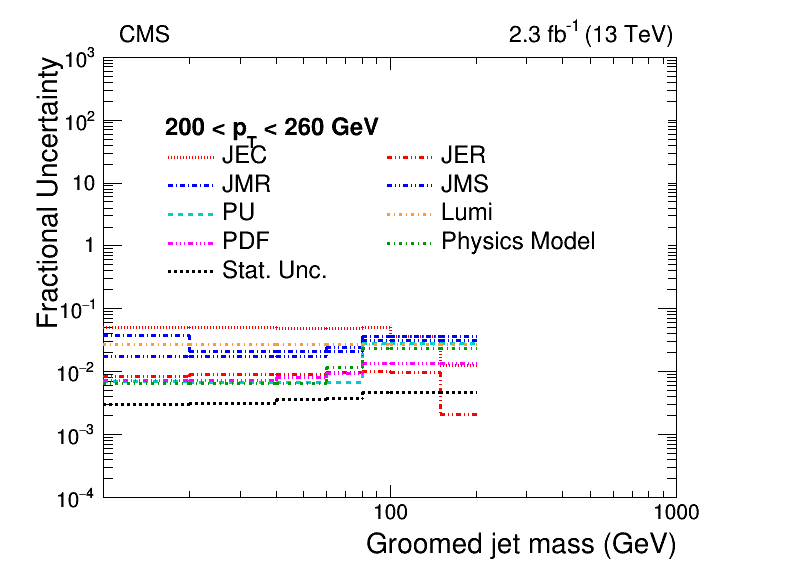

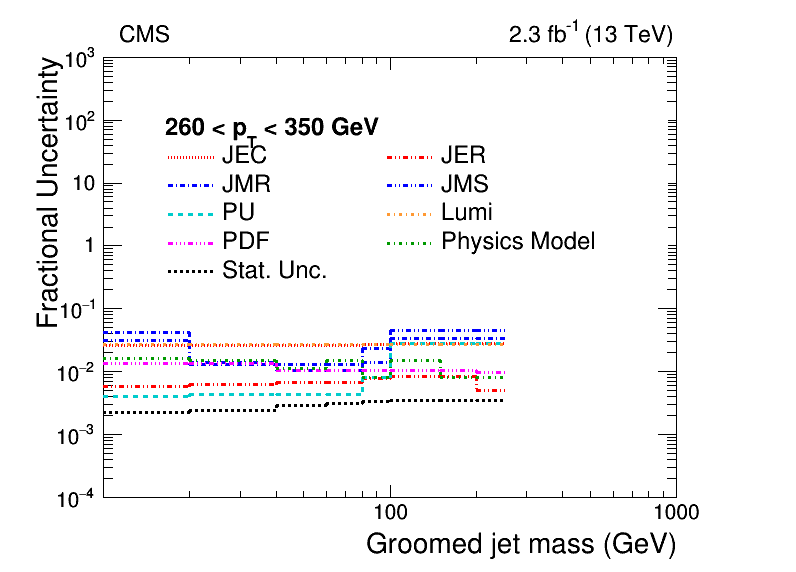

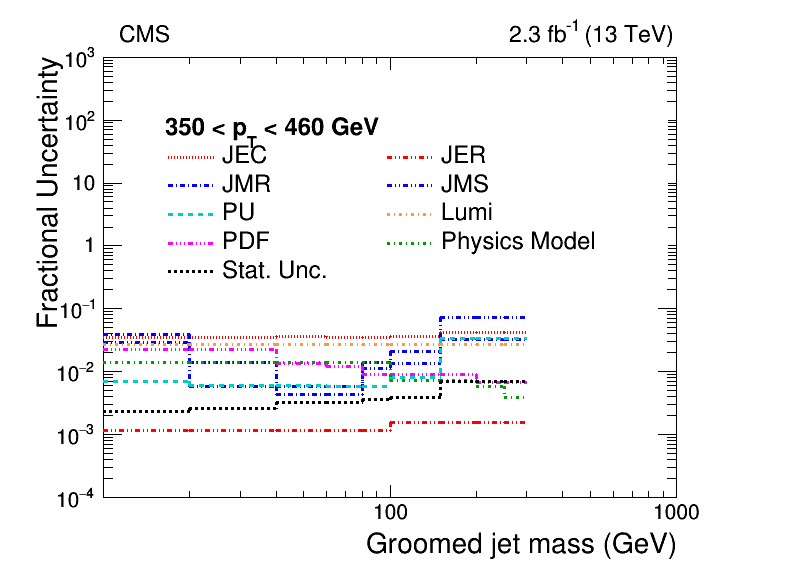

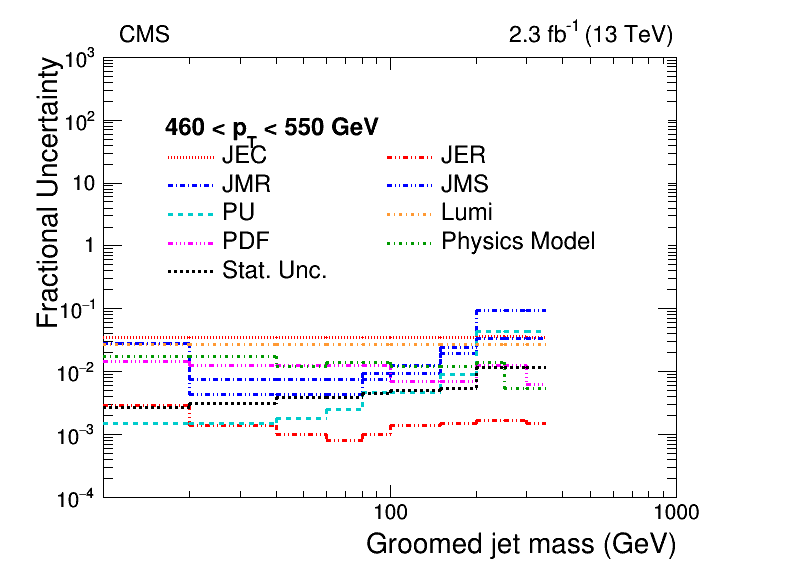

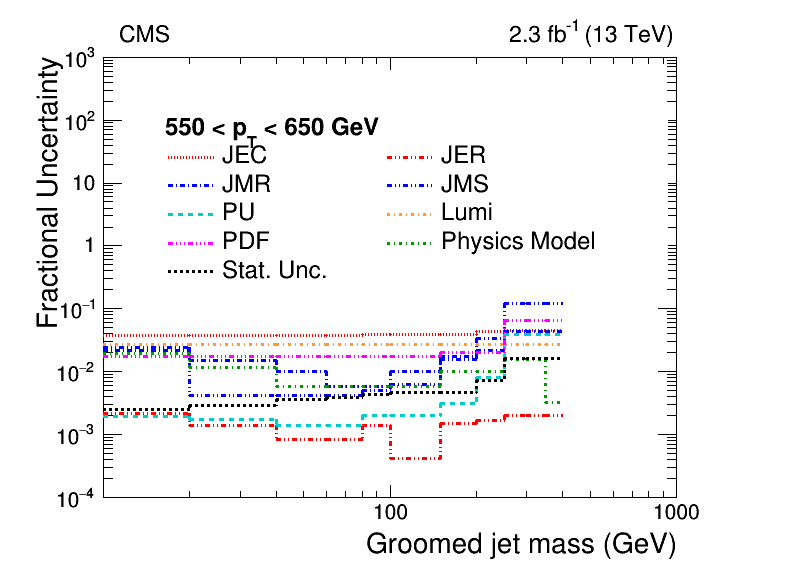

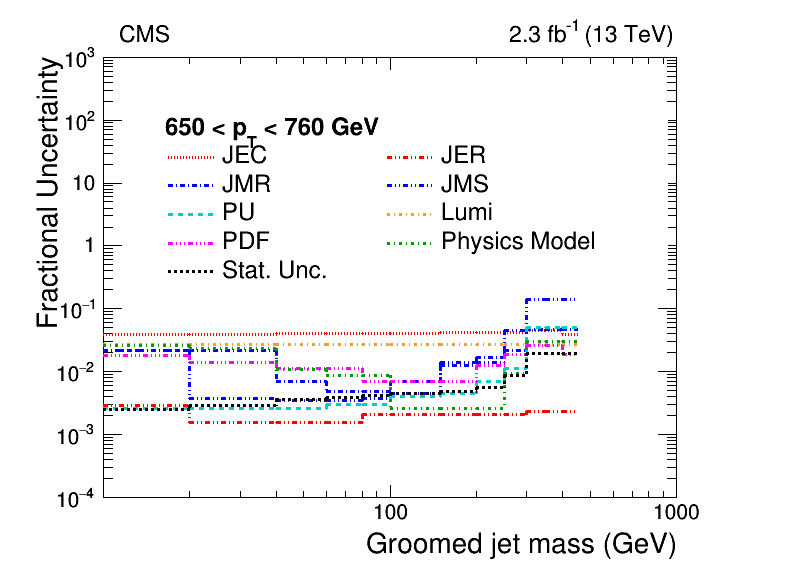

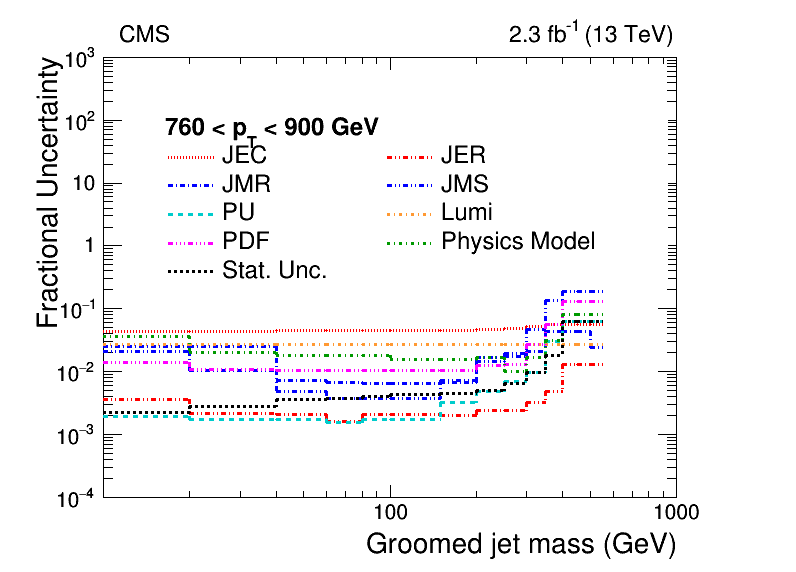

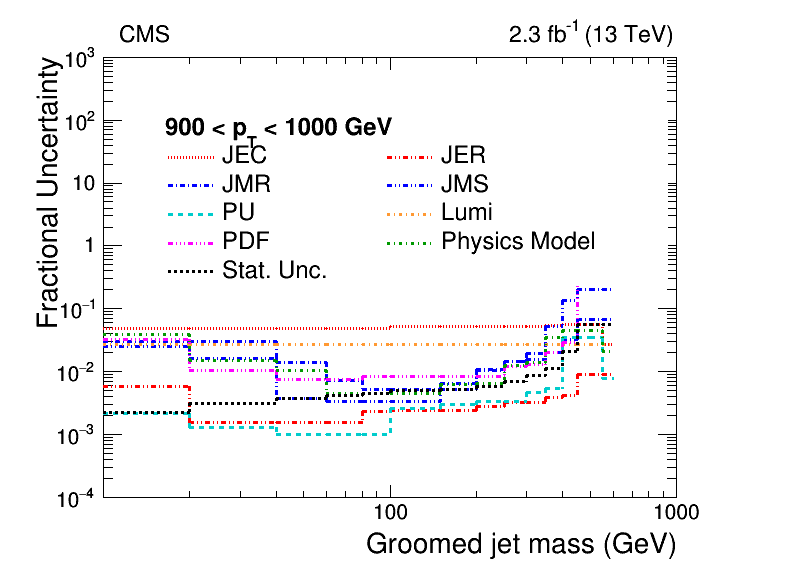

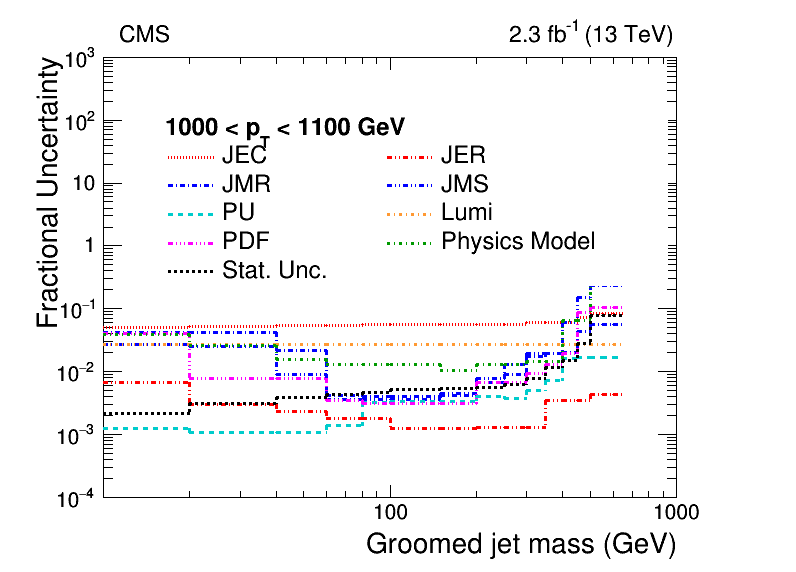

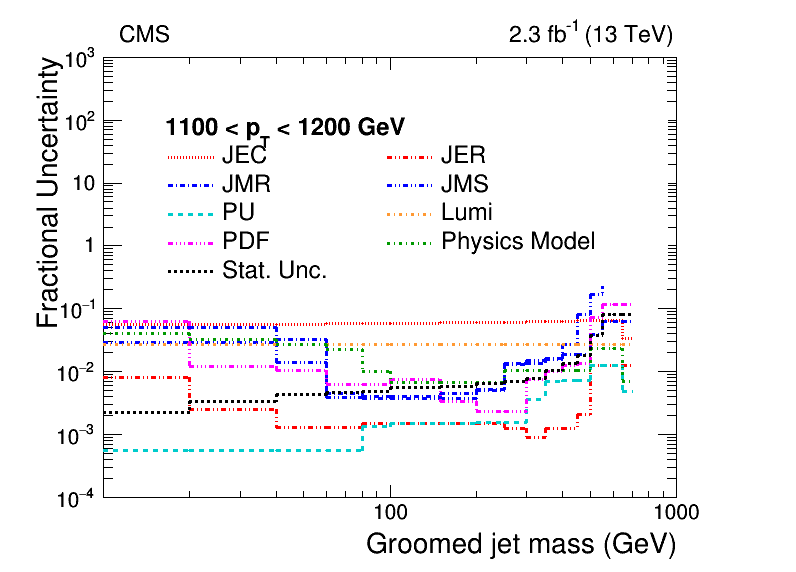

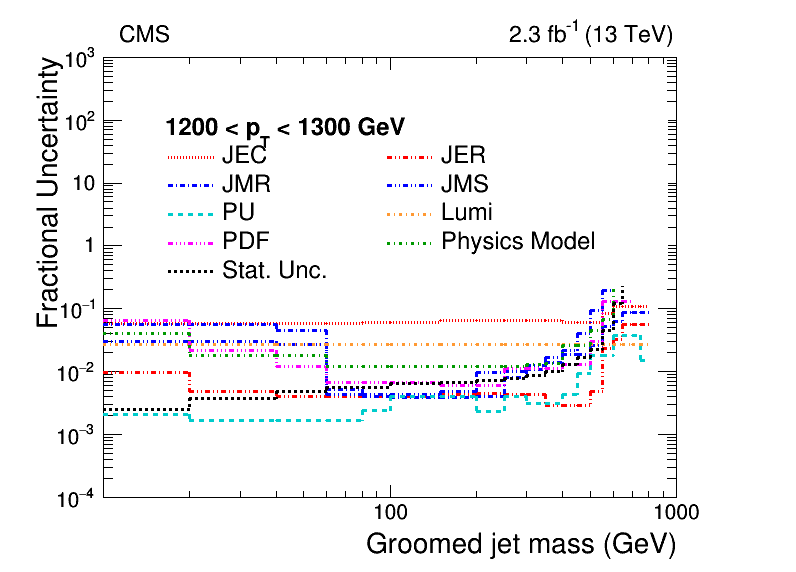

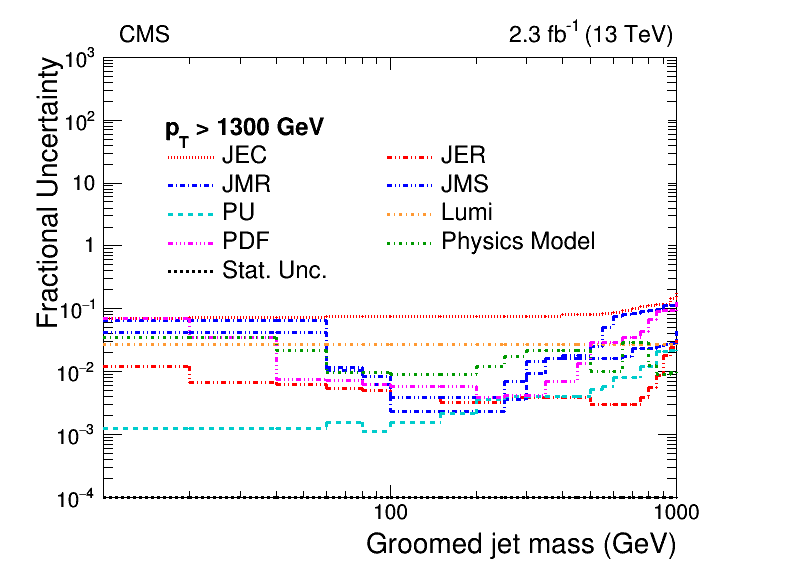

In [6]:
uumc = RooUnfoldUnfolder(useSoftDrop=False,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="ungroomed_absolute")
ugmc = RooUnfoldUnfolder(useSoftDrop=True,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="softdrop_absolute") 

uumc.plotFullUncs( hists=uumc.uncertainties )
ugmc.plotFullUncs( hists=ugmc.uncertainties )




#### Normalized cross section, ungroomed

254535951.654


Info in <TCanvas::Print>: png file fullxs_normalized1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized6.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized7.png has been created
Info in <TCanvas::Print>:

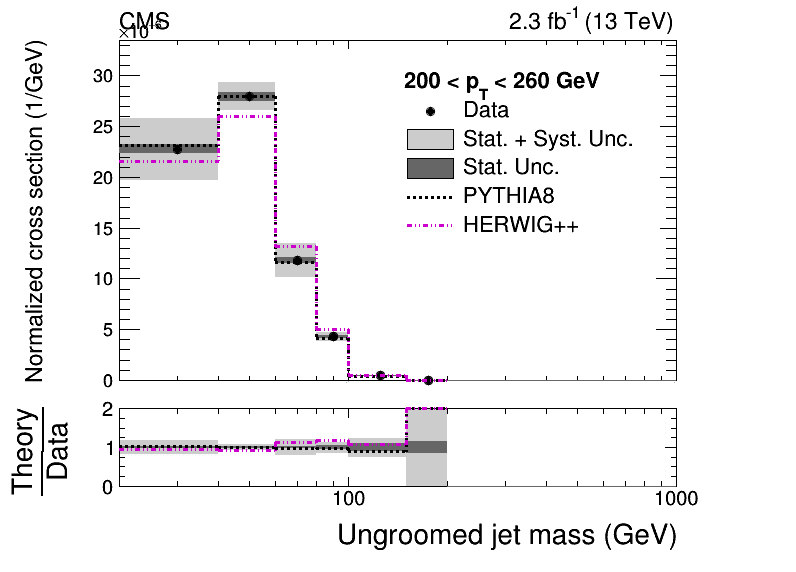

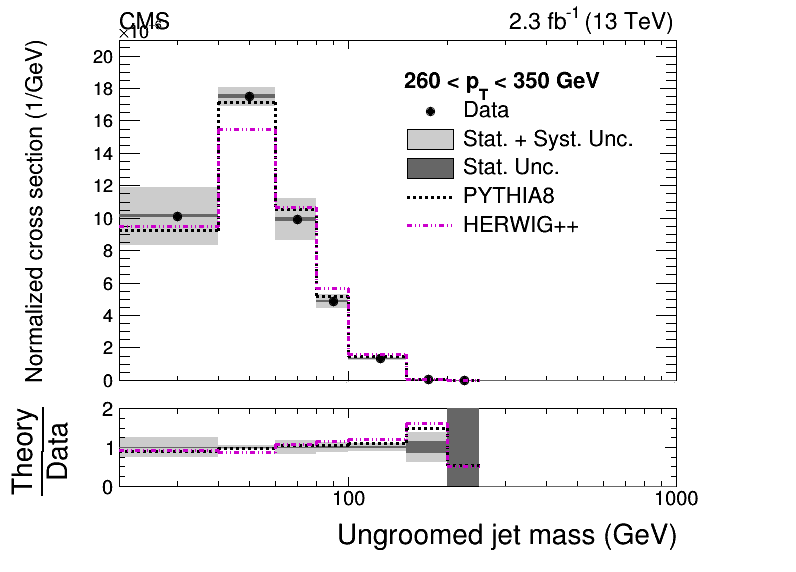

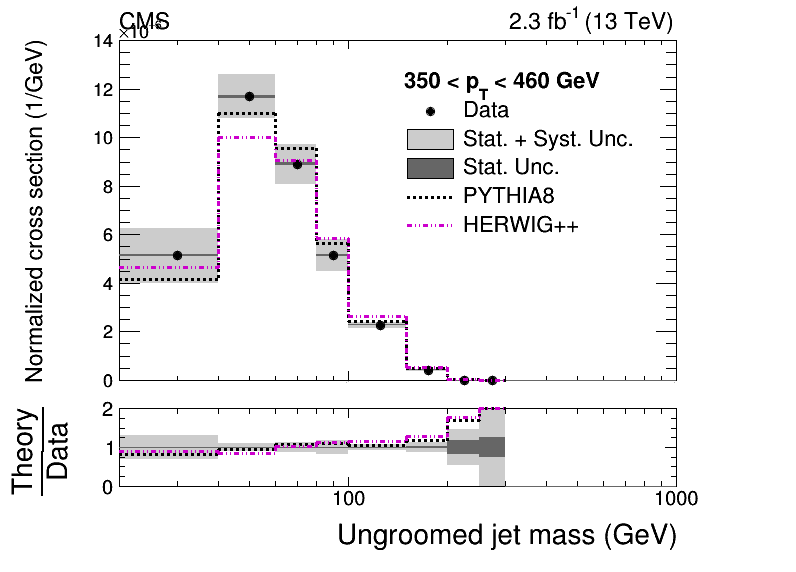

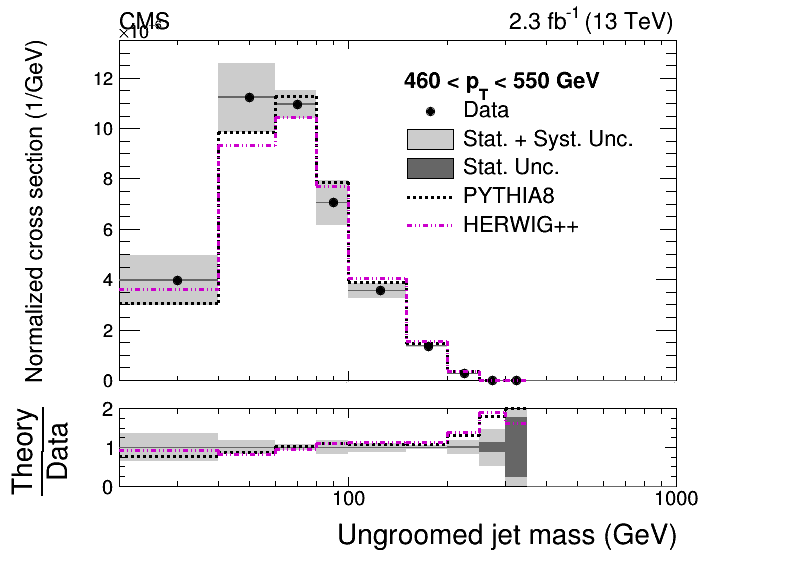

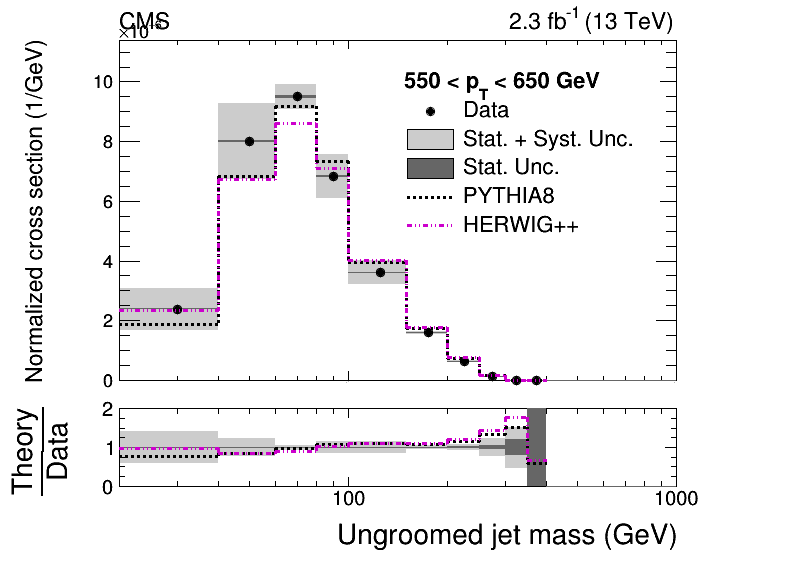

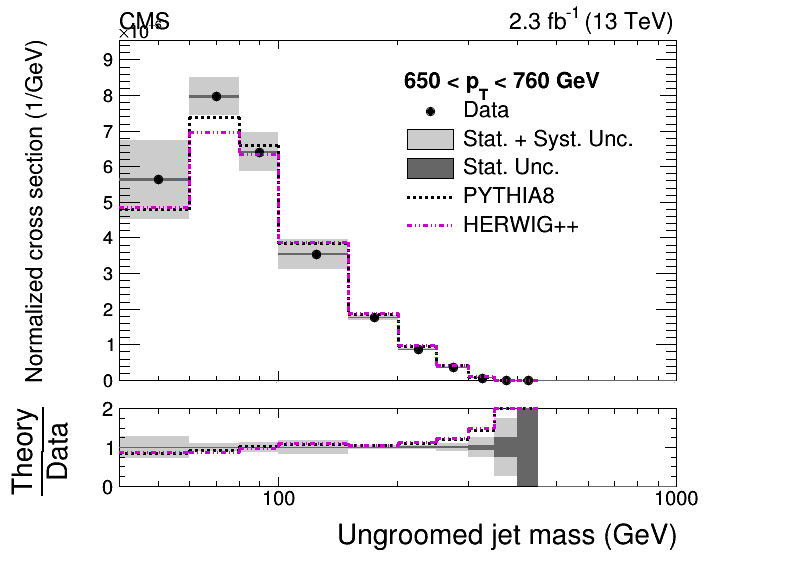

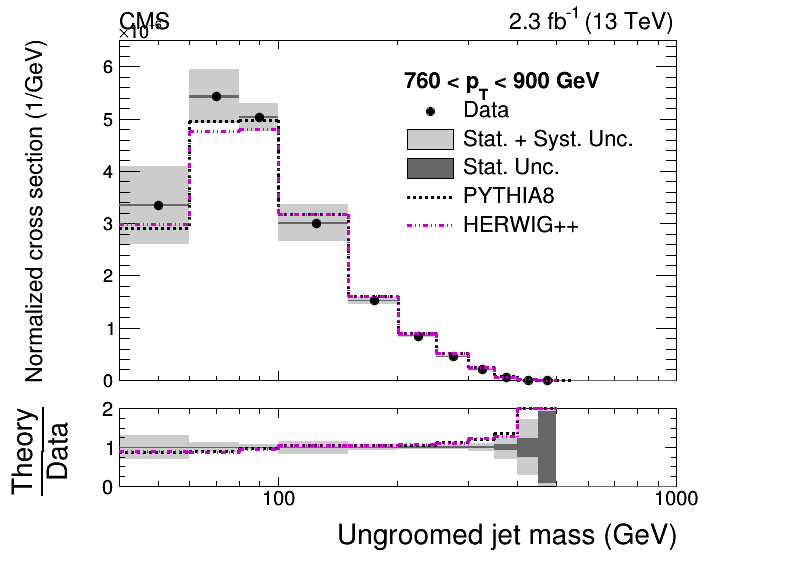

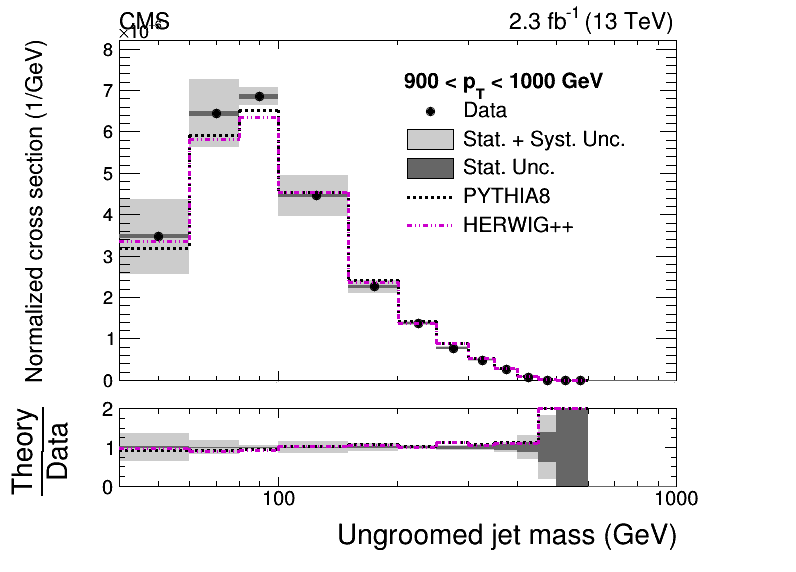

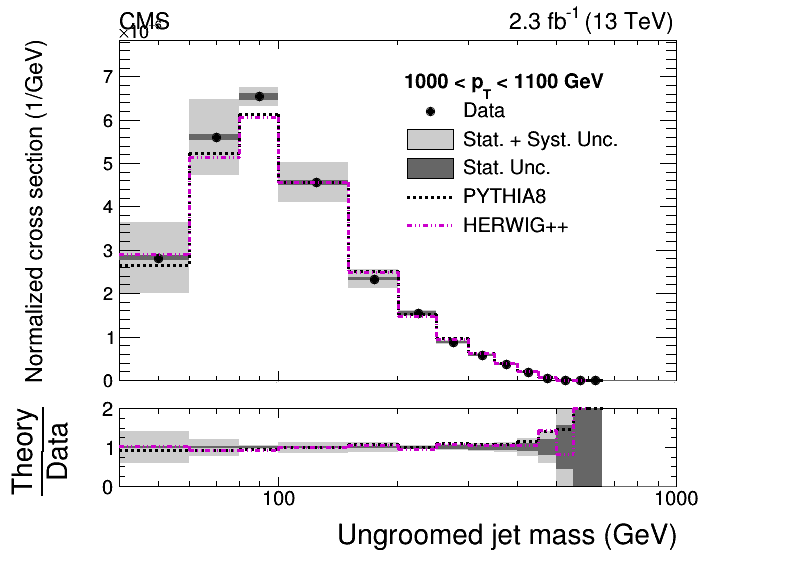

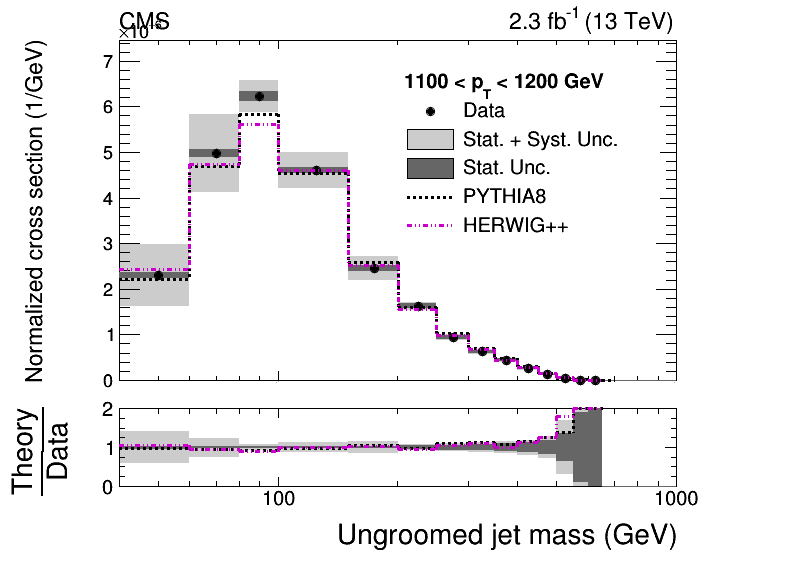

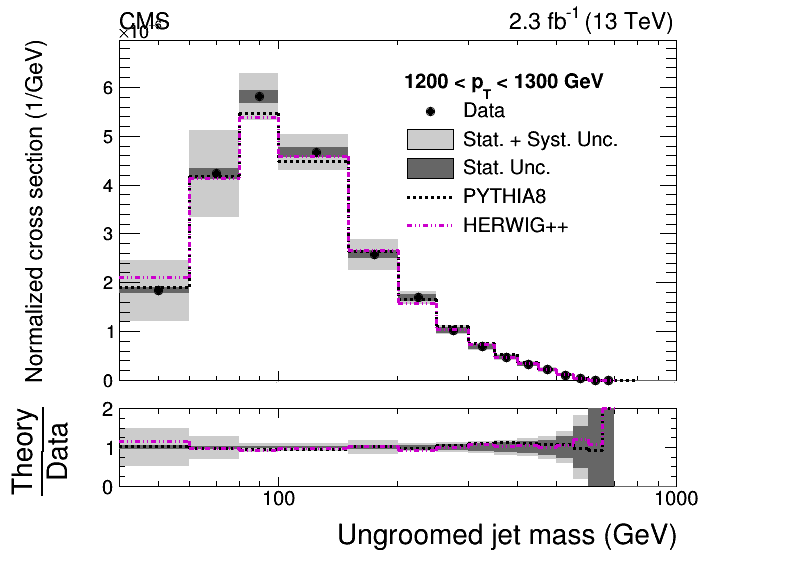

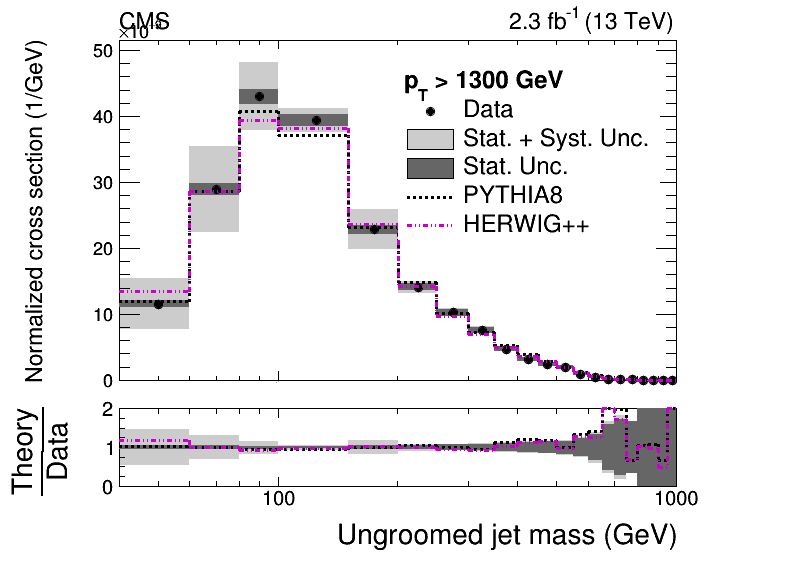

In [7]:
# Now normalized cross section
uu_norm = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized")

uu_norm.plotFullXSProjections( hists=[uu_norm.nom, uu_norm.nomStat,uu_norm.pythiaHist,uu_norm.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )


#### Normalized cross section, groomed

250943650.465


Info in <TCanvas::Print>: png file fullxs_normalized_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop1.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop2.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop3.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop4.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop5.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop5.pdf has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop6.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop6.pdf has been 

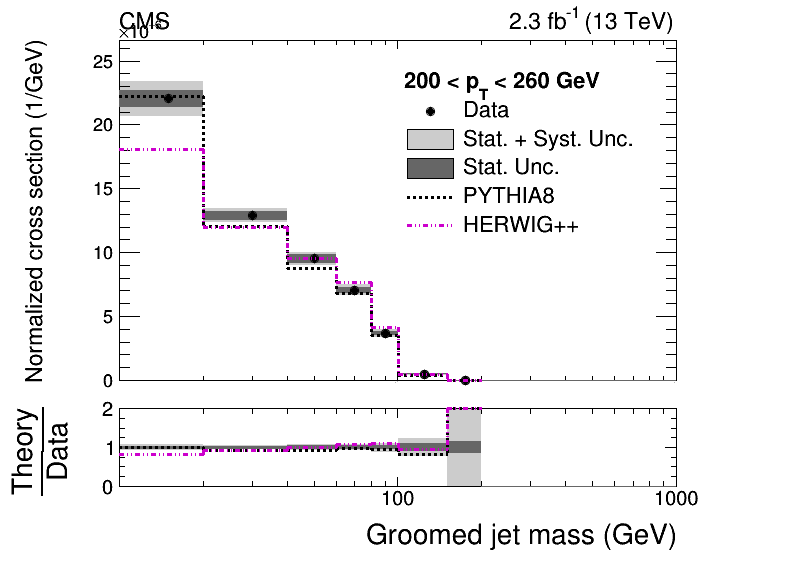

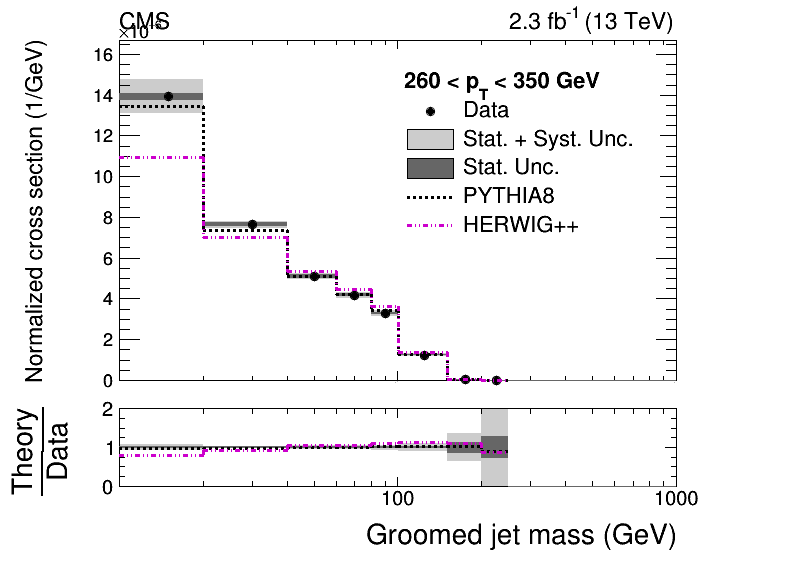

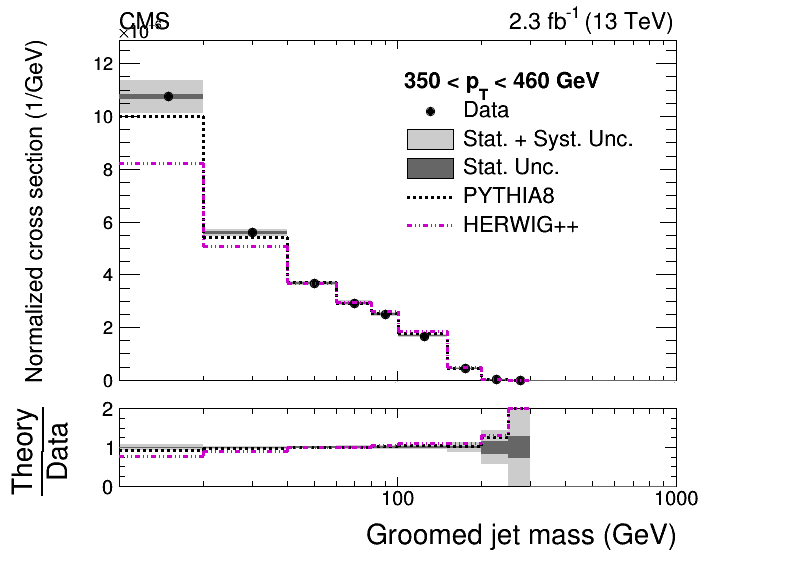

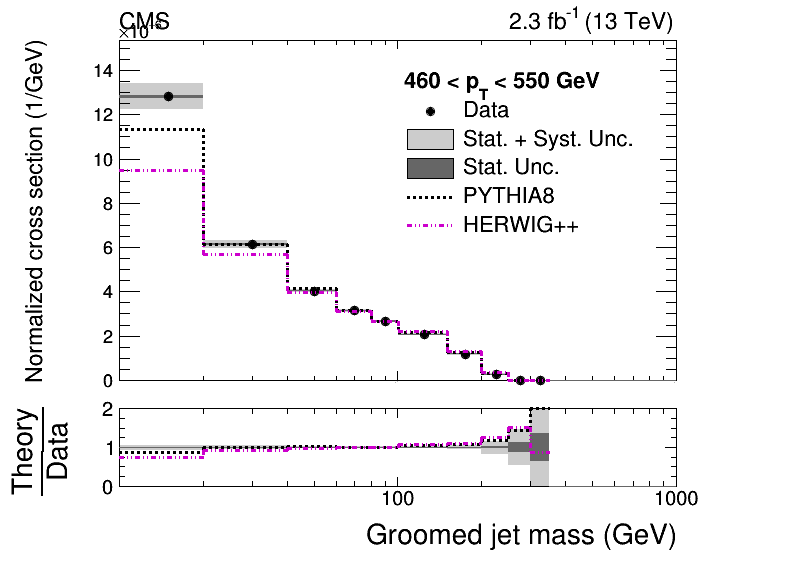

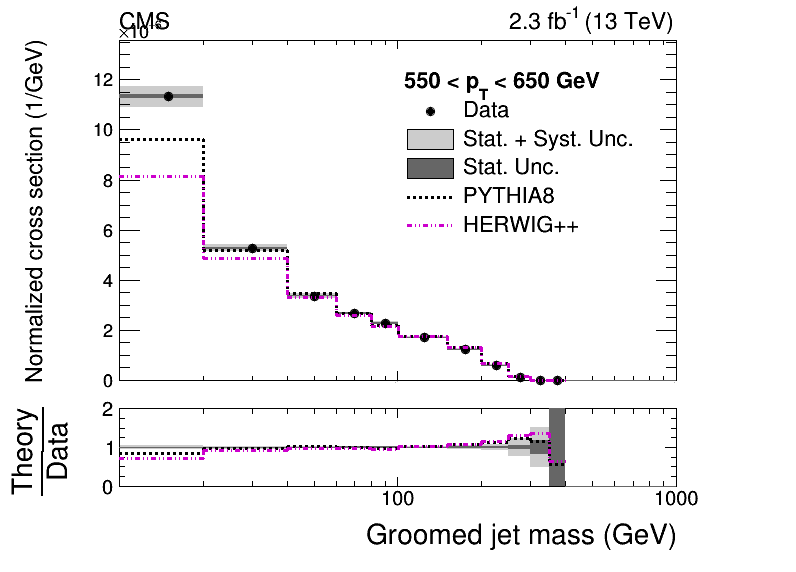

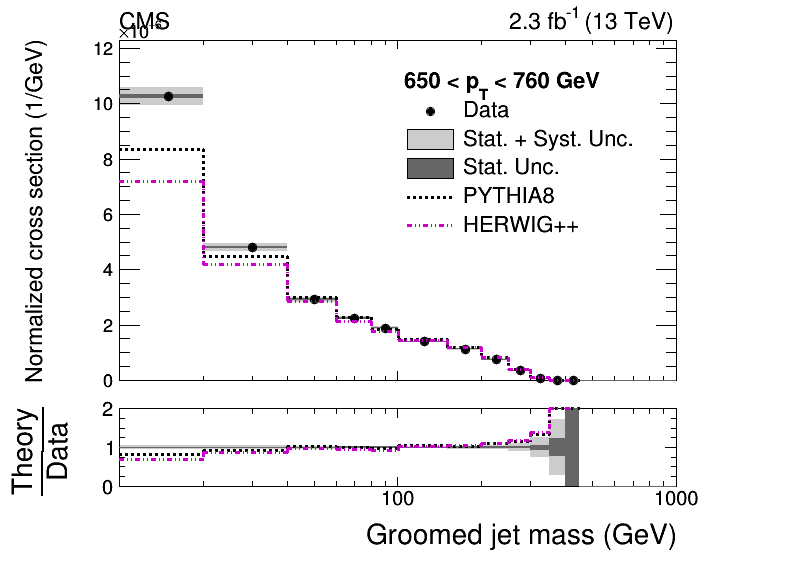

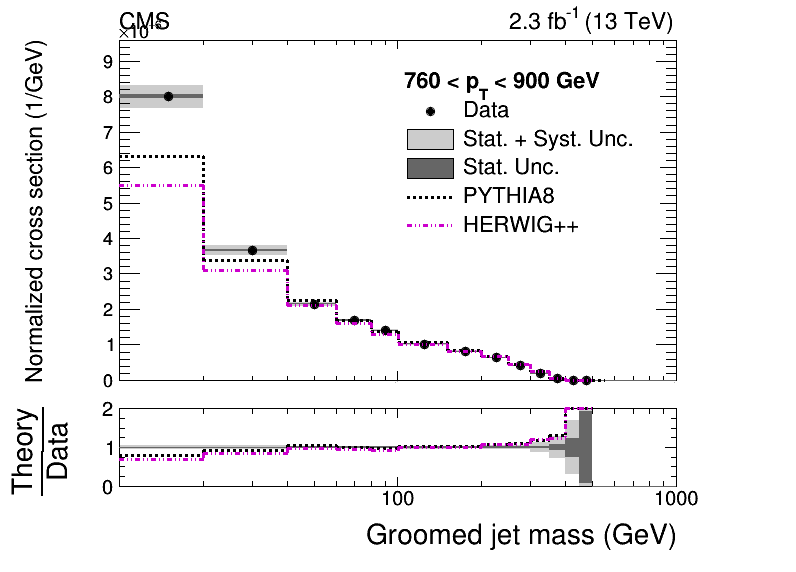

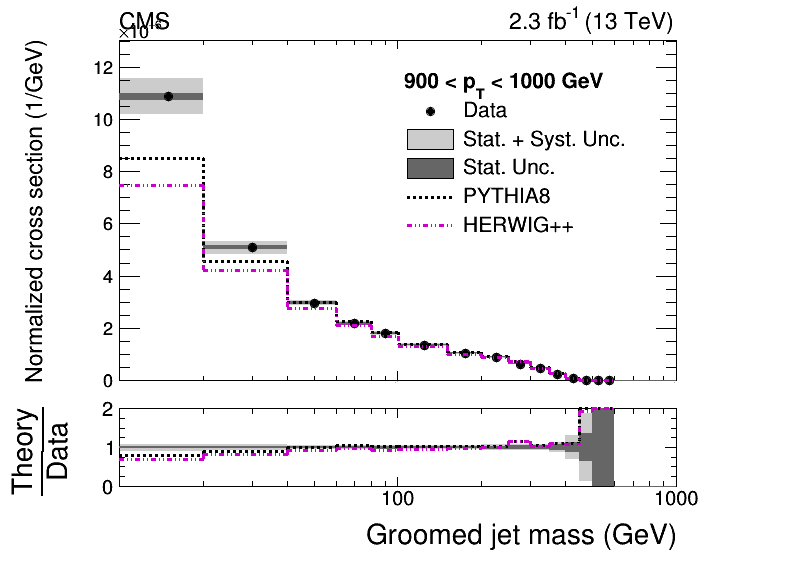

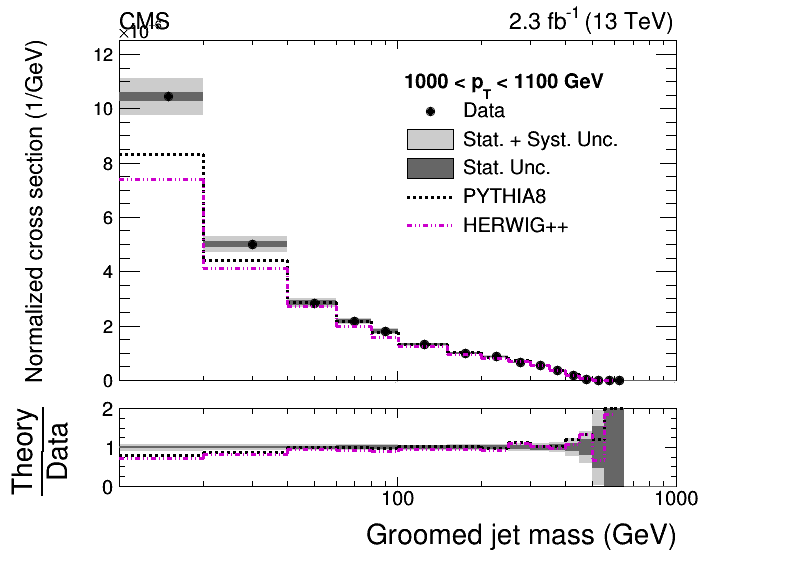

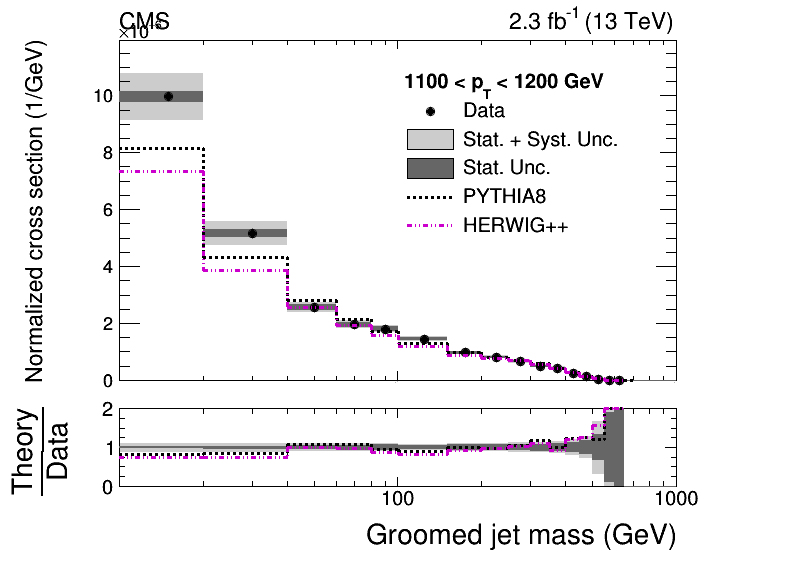

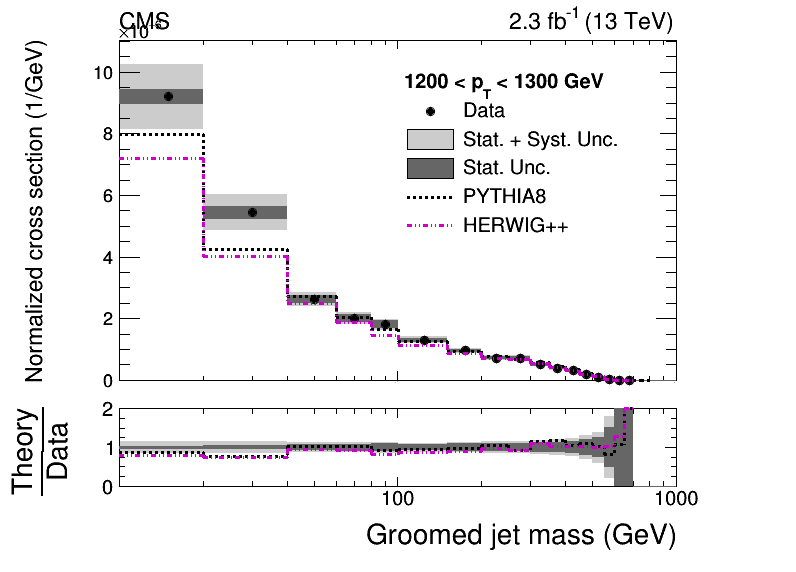

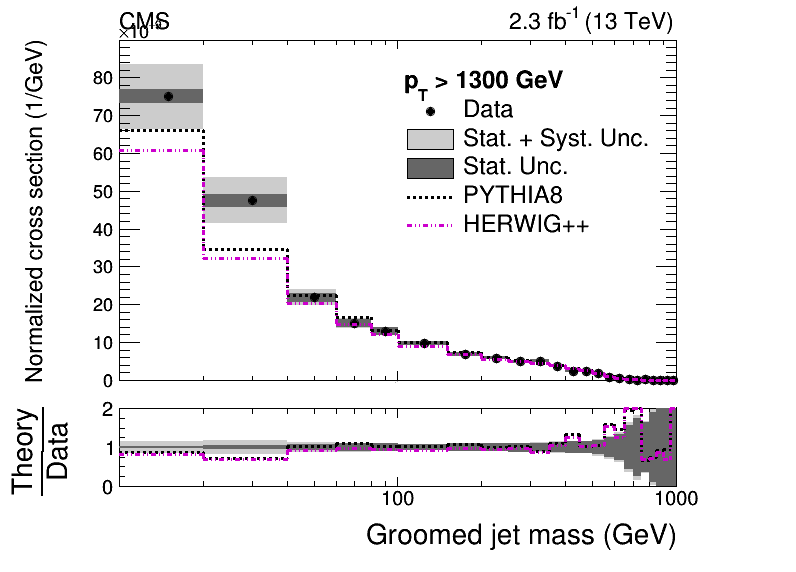

In [8]:

ug_norm = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized_softdrop")

ug_norm.plotFullXSProjections( hists=[ug_norm.nom, ug_norm.nomStat,ug_norm.pythiaHist,ug_norm.herwigHist],
                              styleNames=['nom','nomStat','pythia','herwig'] )




#### Plot 2d cross sections

In [9]:
uu_norm.draw2D("absolute_ungroomed")

In [10]:
ug_norm.draw2D("absolute_groomed") 

In [11]:
uu_norm.draw2D("normalized_ungroomed")

In [12]:
ug_norm.draw2D("normalized_groomed")

#### Ungroomed uncertainties, normalized

123597.850816


Info in <TCanvas::Print>: png file uncertainties_ungroomed1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed1.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed2.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed3.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed4.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed5.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed5.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed6.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed6.pdf has been created
Info in <TCanvas::Print>: pn

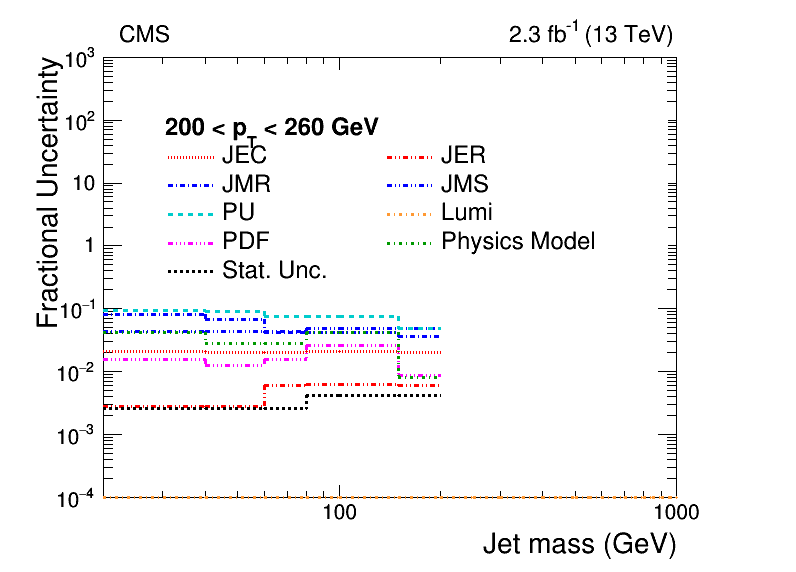

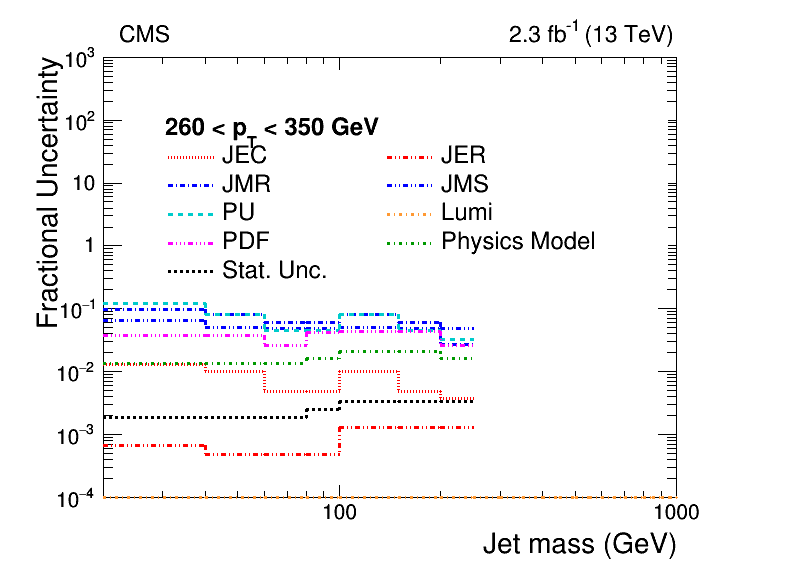

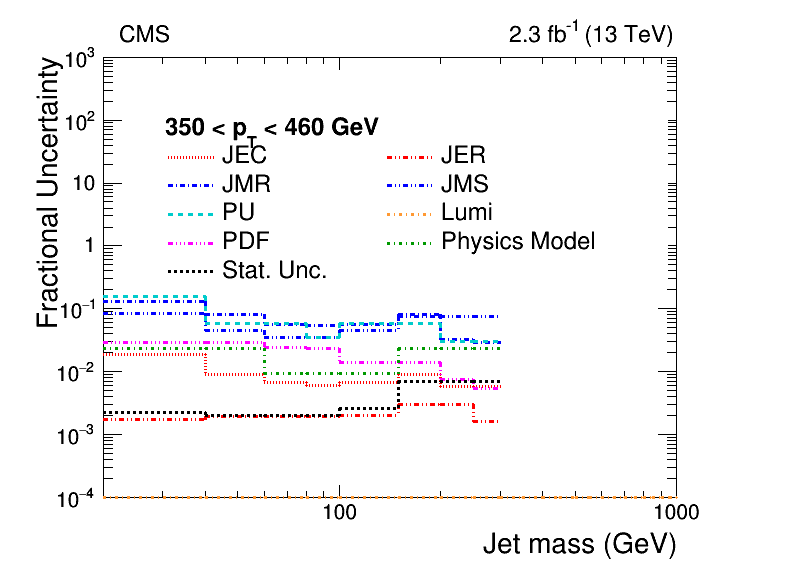

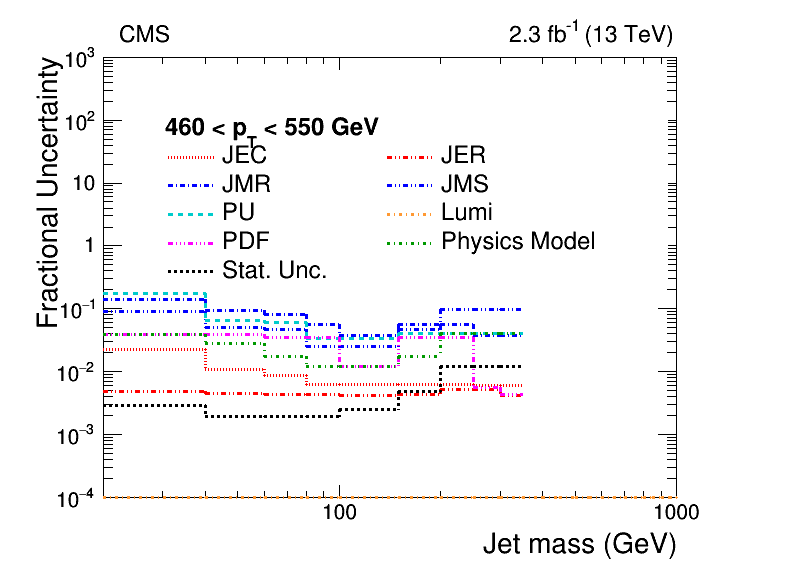

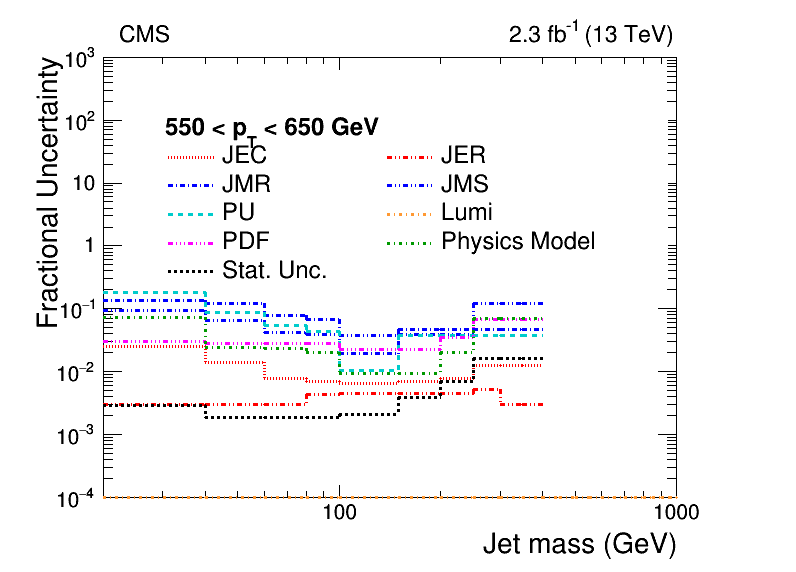

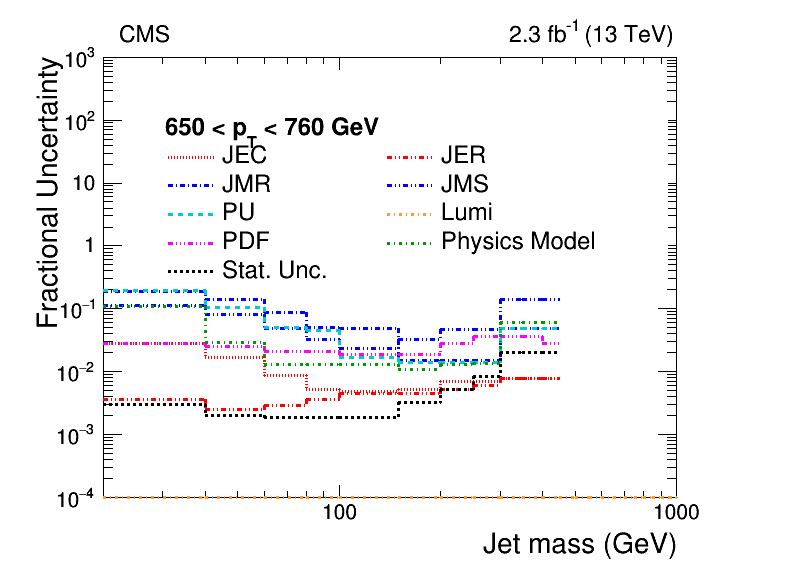

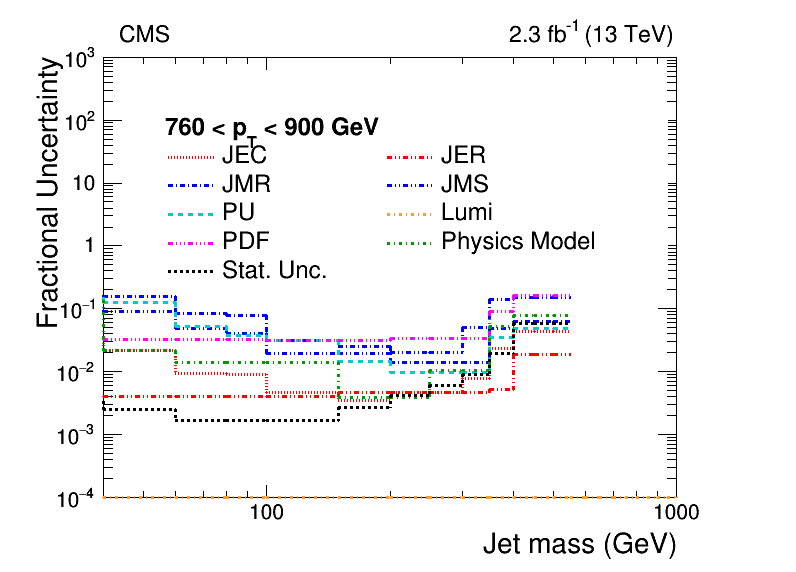

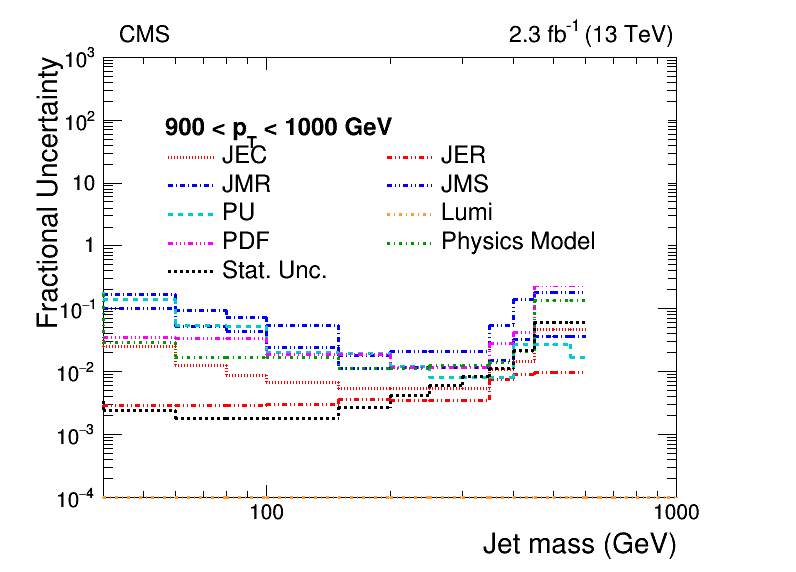

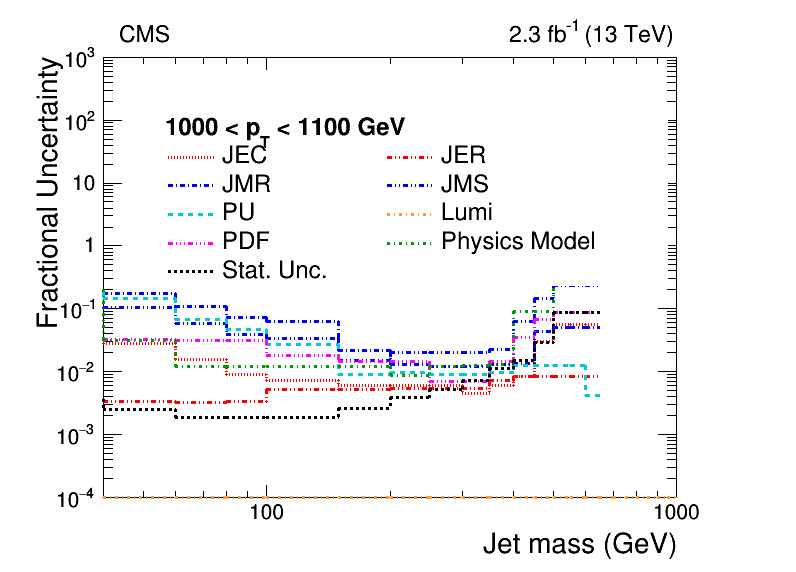

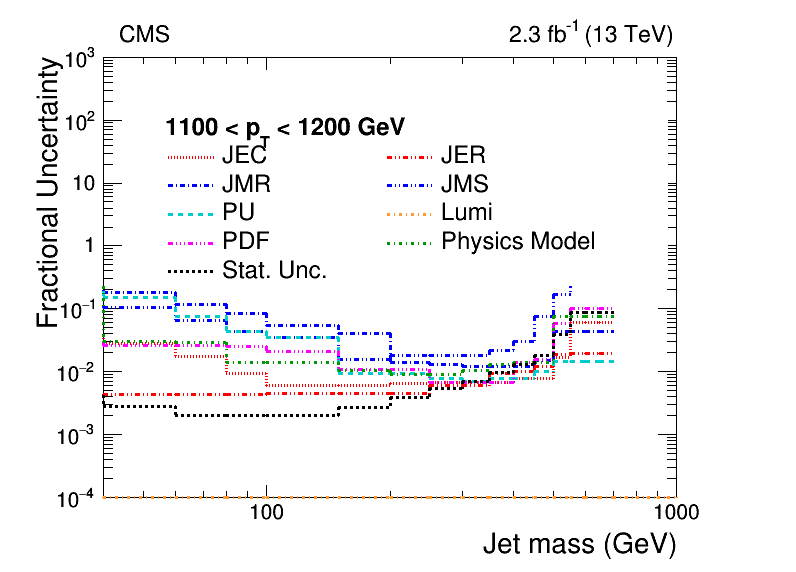

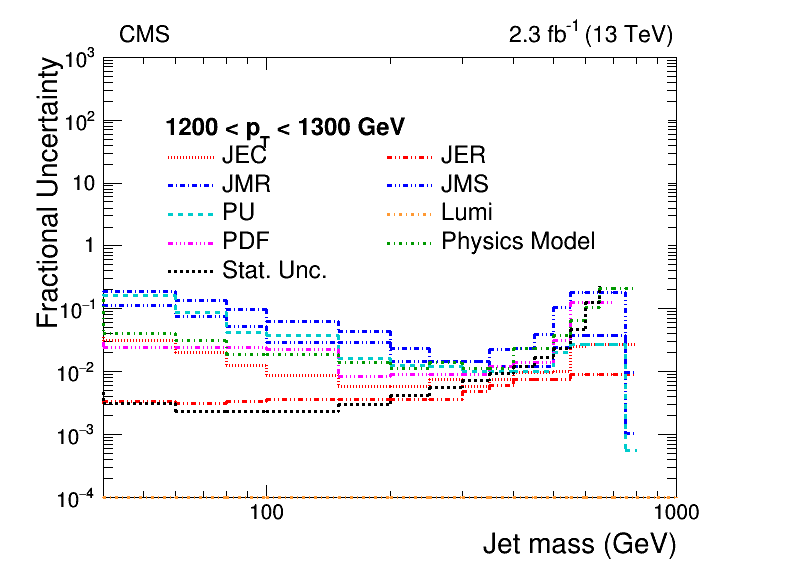

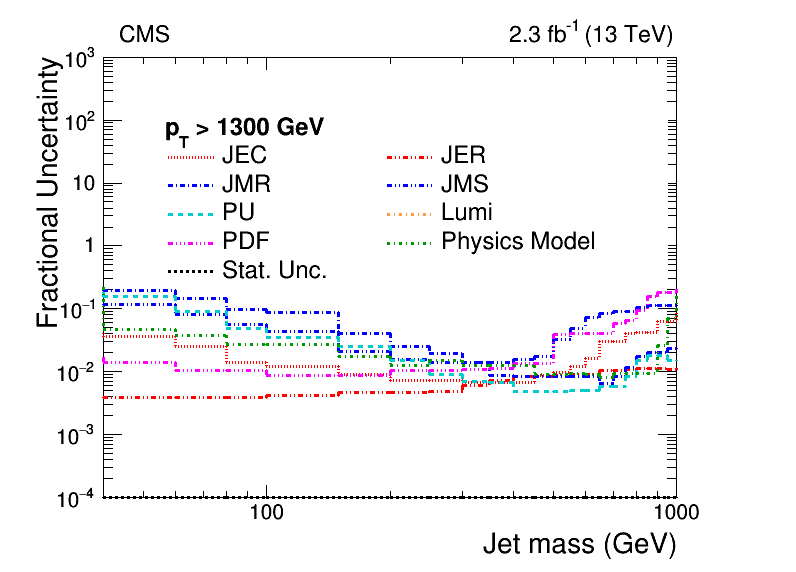

In [13]:


uumc_norm = RooUnfoldUnfolder(useSoftDrop=False, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi, postfix="ungroomed")


uumc_norm.plotFullUncs( hists=uumc_norm.uncertainties)



#### Groomed uncertainties, normalized

123328.214753


Info in <TCanvas::Print>: png file uncertainties_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop1.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop2.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop3.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop4.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop5.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop5.pdf has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop6.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop6.pdf has been created
Info in <TCanvas::Print>: png file uncer

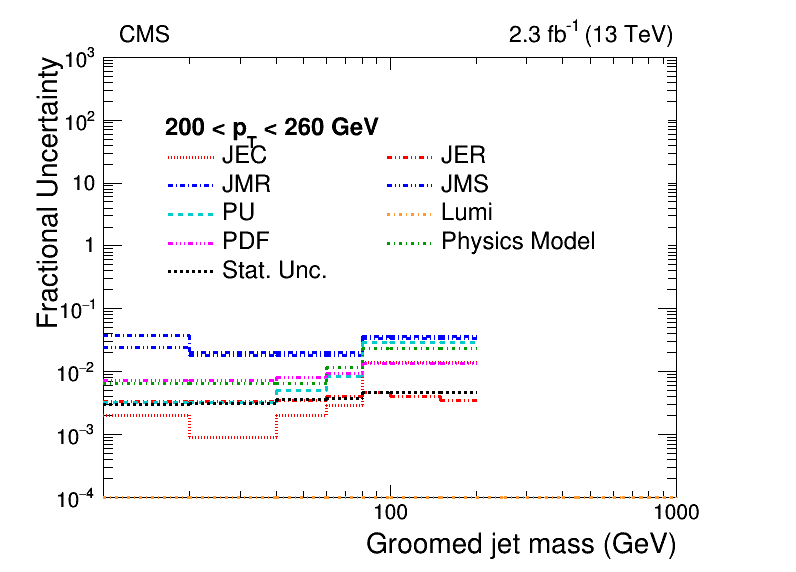

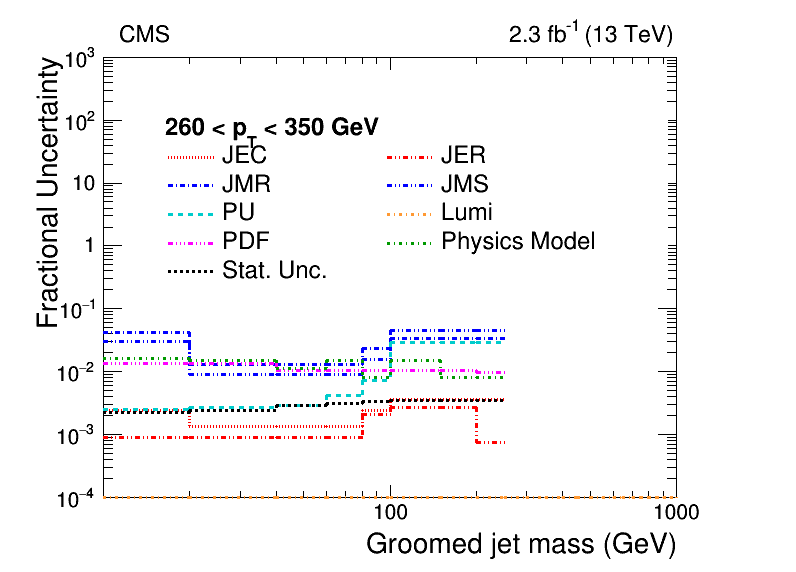

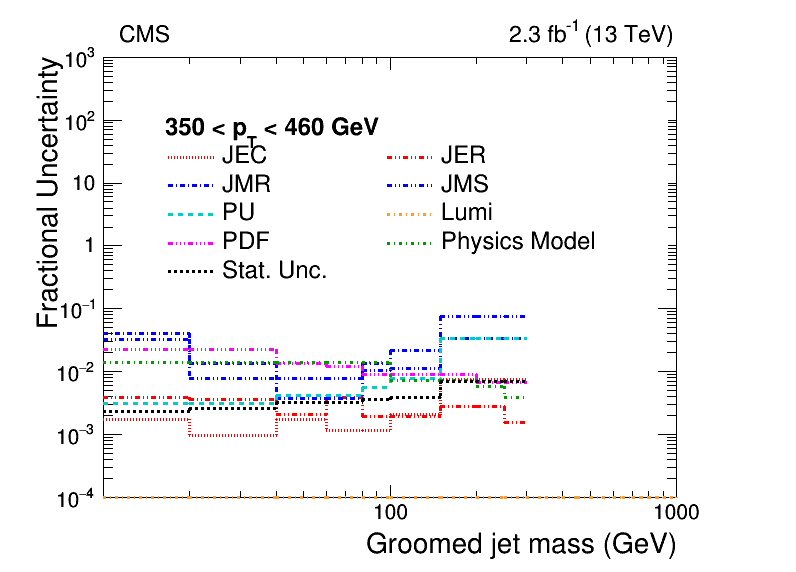

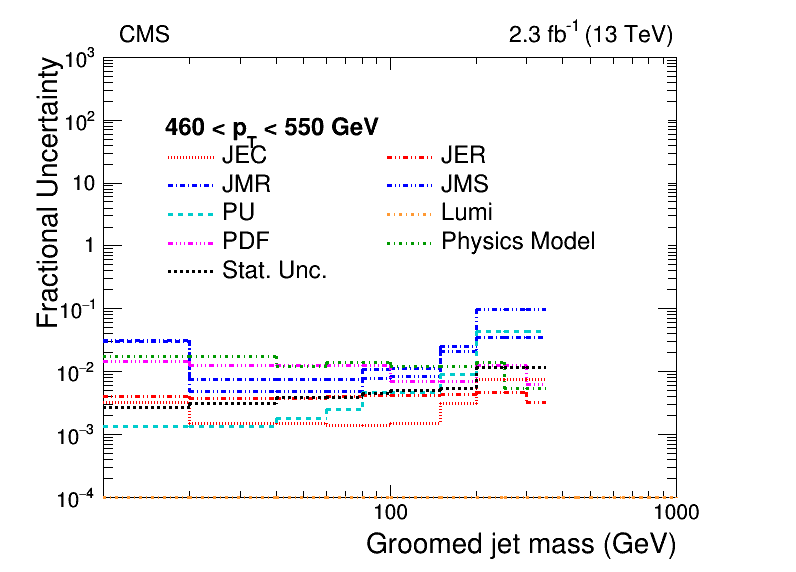

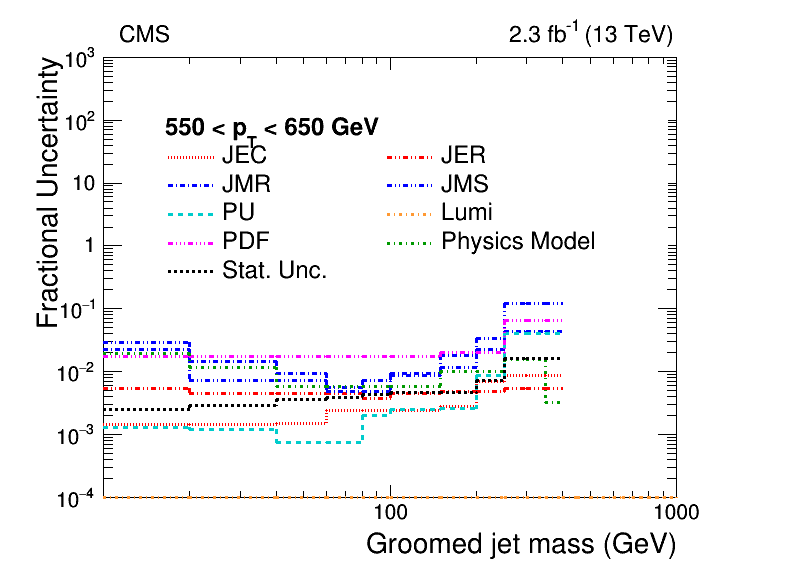

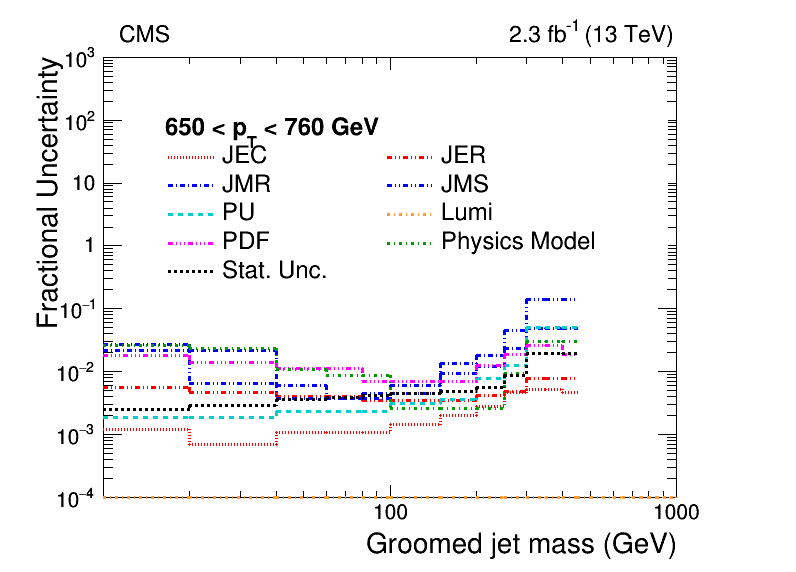

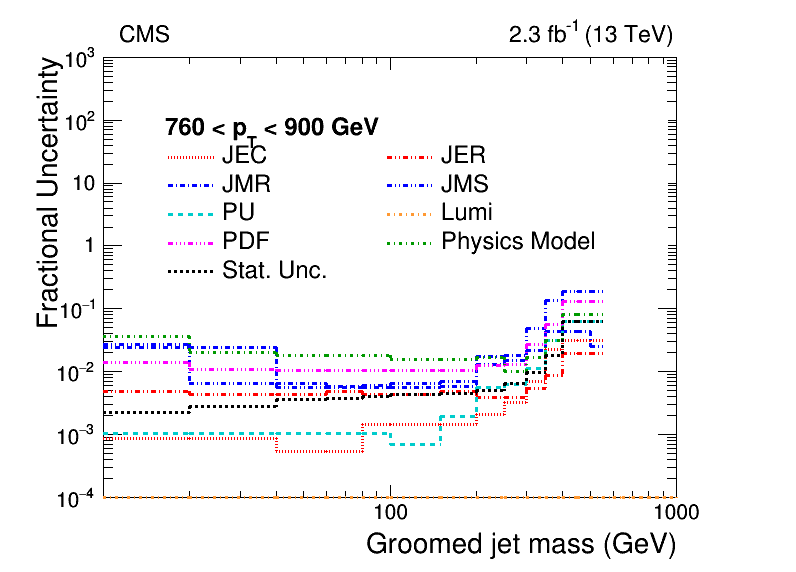

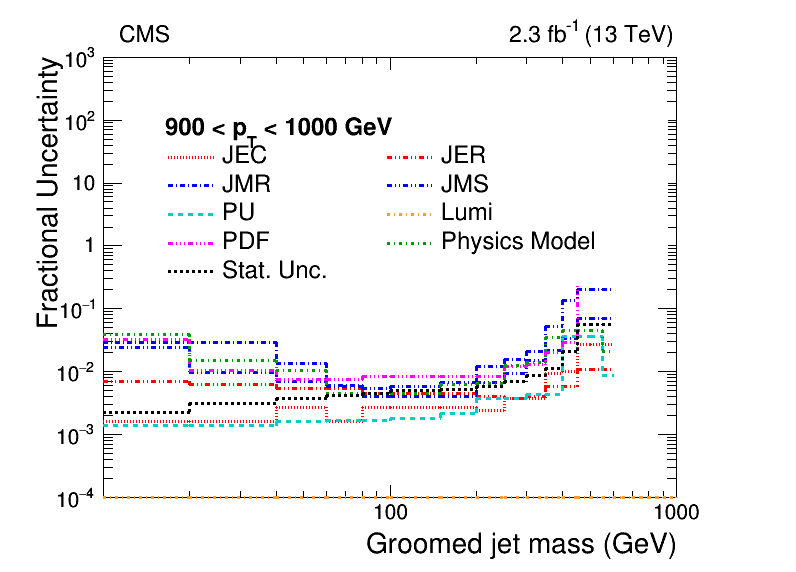

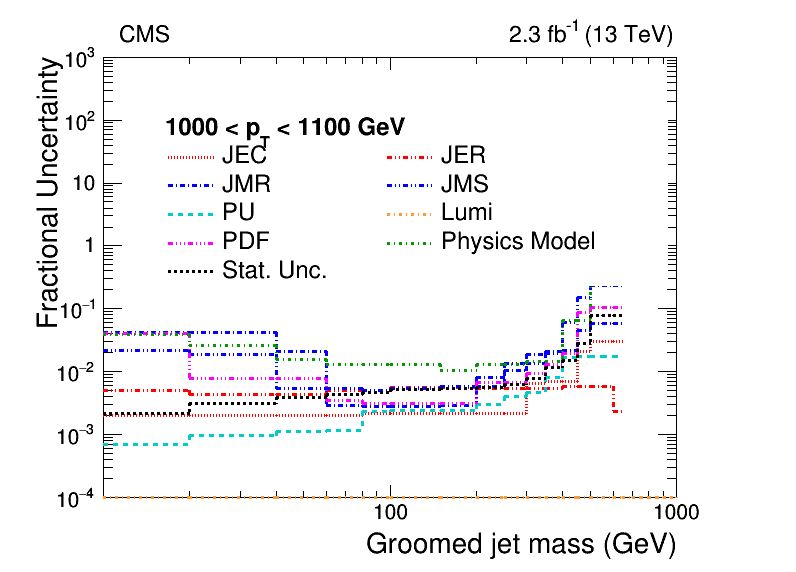

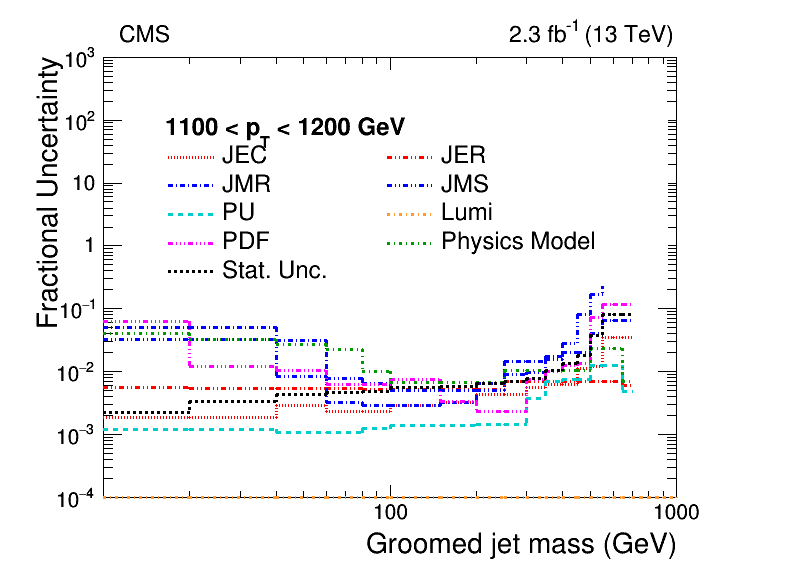

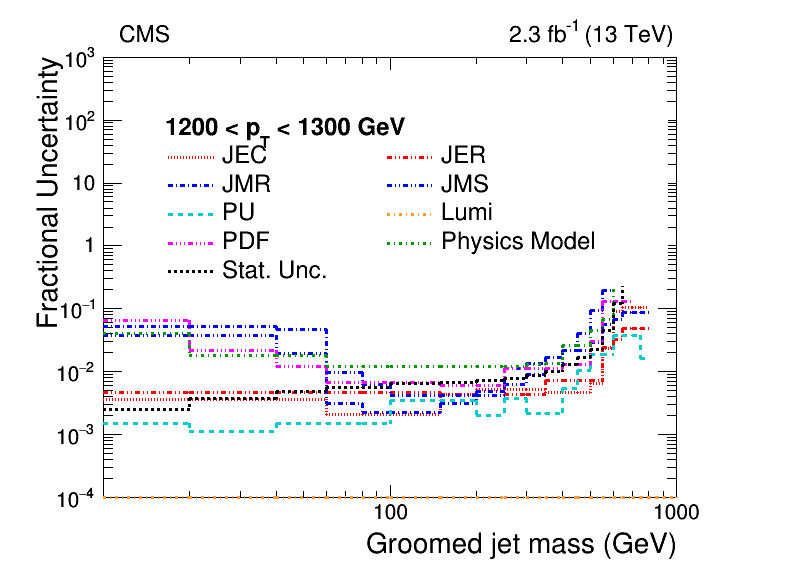

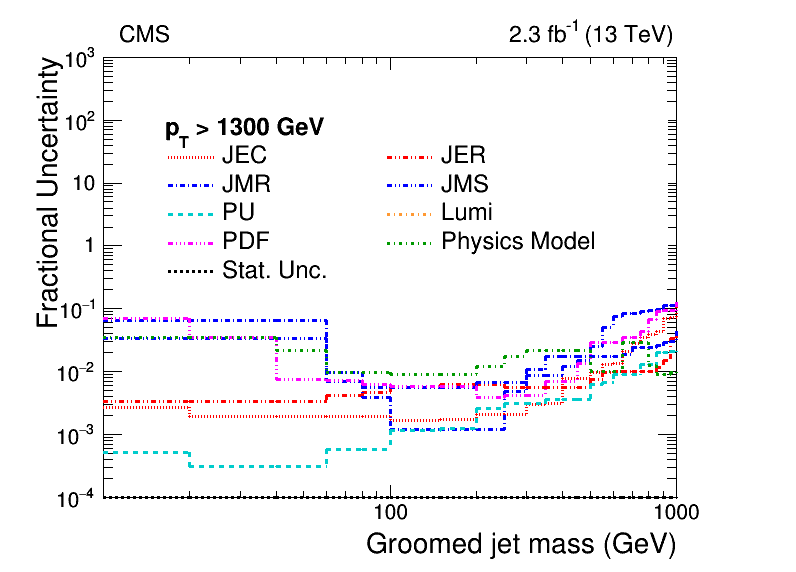

In [14]:

ugmc_norm = RooUnfoldUnfolder(useSoftDrop=True, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,  postfix="softdrop")

ugmc_norm.plotFullUncs(hists=ugmc_norm.uncertainties)

